In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('2011-16 Star.xlsx')
df

Player  Pk     Age    SOS    FG   FGA    FG%   2P   2PA  \
0         Kyrie Irving   1  19.096   8.31   7.3  13.7  0.529  4.9   8.6   
1       Brandon Knight   8  19.208   8.91   6.4  15.1  0.423  3.8   8.3   
2         Kemba Walker   9  21.051  10.44   8.2  19.2  0.428  6.2  13.3   
3      Jimmer Fredette  10  22.123   5.76  10.5  23.1  0.452  6.7  13.7   
4          Nolan Smith  21  22.338   8.31   8.3  18.0  0.458  6.4  12.9   
..                 ...  ..     ...    ...   ...   ...    ...  ...   ...   
230      Jahlil Okafor   3  19.197   9.87   9.8  14.7  0.664  9.8  14.7   
231       Jakob Poeltl   9  20.257   8.79   8.3  12.9  0.646  8.3  12.9   
232     Chinanu Onuaku  37  19.239   7.74   7.2  11.6  0.620  7.2  11.5   
233      Diamond Stone  40  19.138   8.31   8.3  14.6  0.568  8.3  14.6   
234  Stephen Zimmerman  41  19.292   3.17   6.0  12.6  0.477  5.7  11.6   

       2P%  ...  BLK%  TOV%   AST:TOV  Hght\n(inches)  Weight  RSCI Rank  \
0    0.569  ...   1.8  16.4  1.722222              75     193        3.0   
1    0.461  ...   0.6  16.8  1.342857              75     195        5.0   
2    0.471  ...   0.5   9.5  2.000000              73     184       16.0   
3    0.491  ...   0.1  12.7  1.200000              74     195        NaN   
4    0.501  ...   0.2  14.8  1.621622              74     190       19.0   
..     ...  ...   ...   ...       ...             ...     ...        ...   
230  0.664  ...   4.5  15.6  0.515152              83     260        2.0   
231  0.646  ...   5.0  13.7  0.962963              84     248        NaN   
232  0.623  ...   9.6  20.8  0.794118              82     245       63.0   
233  0.568  ...   7.1  12.9  0.269231              83     255        6.0   
234  0.492  ...   7.5  17.1  0.406250              84     240        9.0   

     Max Measured Wingspan (inches)  Avg Measured Wingspan (inches  \
0                             76.00                          75.67   
1                             78.75                          78.38   
2                             75.50                          74.50   
3                             77.00                          76.75   
4                             78.00                          77.88   
..                              ...                            ...   
230                           90.25                          89.06   
231                           86.75                          85.88   
232                           86.75                          86.63   
233                           88.00                          86.89   
234                           87.25                          86.80   

     Difference  All Star  
0          1.00         1  
1          3.75         0  
2          2.50         1  
3          3.00         0  
4          4.00         0  
..          ...       ...  
230        7.25         0  
231        2.75         0  
232        4.75         0  
233        5.00         0  
234        3.25         0  

[235 rows x 45 columns]

In [3]:
import dabl

In [4]:
df['RSCI Rank'] = pd.to_numeric(df['RSCI Rank'], errors='coerce')
df['RSCI Rank'] = df['RSCI Rank'].fillna(df['RSCI Rank'].mean())

Target looks like classification
Showing only top 10 of 43 continuous features


/opt/anaconda3/lib/python3.7/site-packages/dabl/plot/utils.py:621: UserWarning: Dropped 1 outliers in column Age.
  int(dropped), series.name), UserWarning)


Linear Discriminant Analysis training set score: 0.667


/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


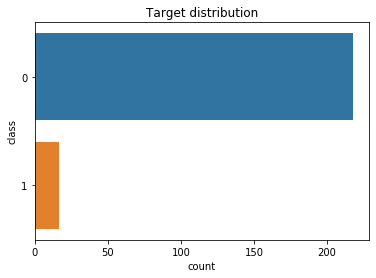

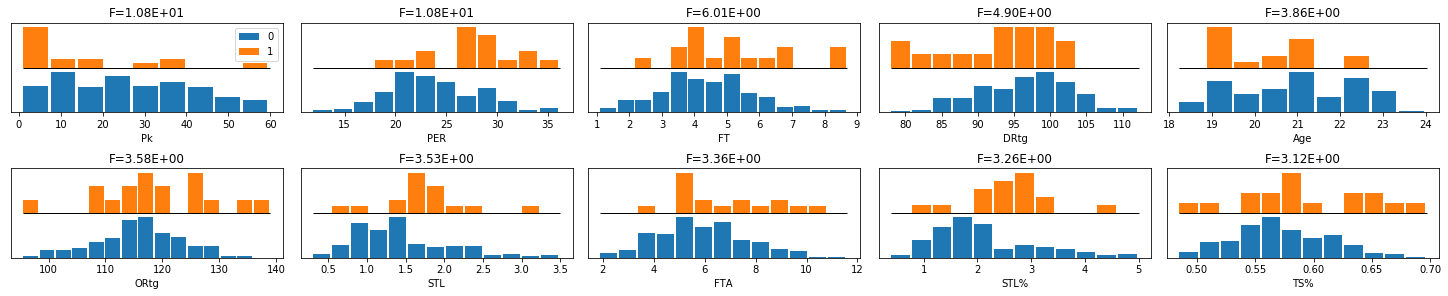

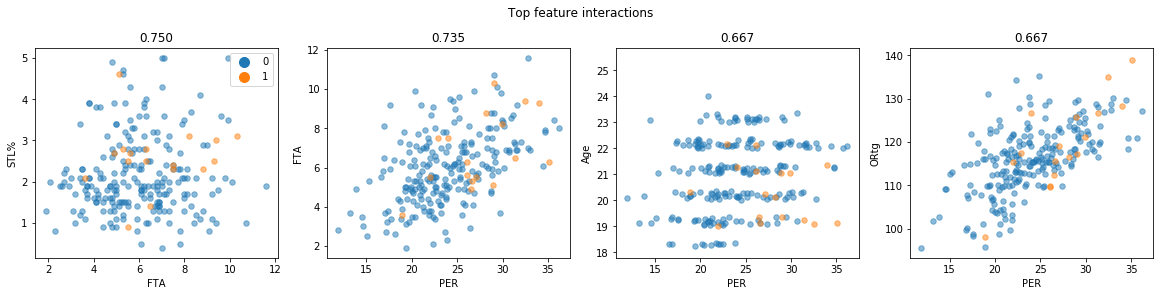

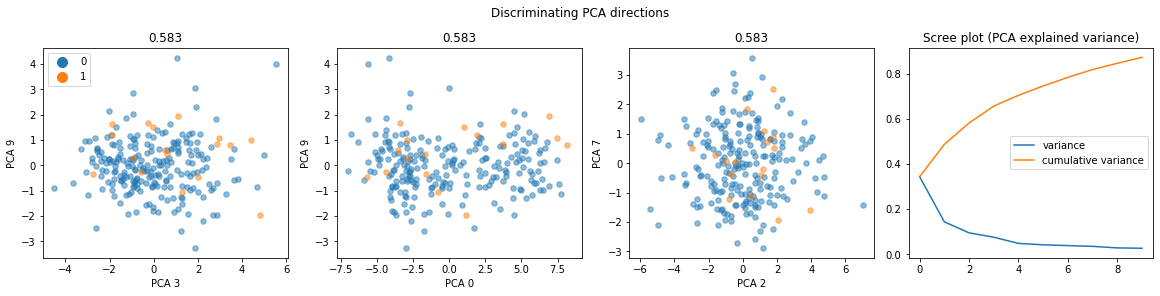

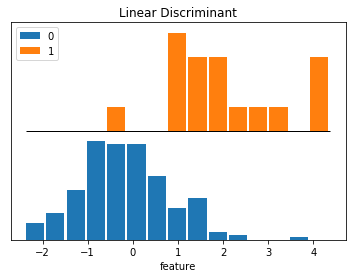

In [5]:
dabl.plot(df, target_col="All Star")

In [6]:
sc = dabl.SimpleClassifier()
sc.fit(df, target_col='All Star')

Running DummyClassifier(strategy='prior')
accuracy: 0.928 average_precision: 0.072 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.481
=== new best DummyClassifier(strategy='prior') (using recall_macro):
accuracy: 0.928 average_precision: 0.072 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.481

Running GaussianNB()
accuracy: 0.443 average_precision: 0.106 roc_auc: 0.603 recall_macro: 0.584 f1_macro: 0.373
=== new best GaussianNB() (using recall_macro):
accuracy: 0.443 average_precision: 0.106 roc_auc: 0.603 recall_macro: 0.584 f1_macro: 0.373

Running MultinomialNB()
accuracy: 0.923 average_precision: 0.153 roc_auc: 0.650 recall_macro: 0.498 f1_macro: 0.480
Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.620 average_precision: 0.102 roc_auc: 0.572 recall_macro: 0.572 f1_macro: 0.465
Running DecisionTreeClassifier(class_weight='balanced', max_depth=5)
accuracy: 0.825 average_precision: 0.093 roc_auc: 0.468 recall_macro: 0.468 f1_macro: 0.480
Running Deci

SimpleClassifier(random_state=None, refit=True, shuffle=True, type_hints=None,
                 verbose=1)

In [7]:
X = df.drop(['Player','All Star'], axis=1)
y = df['All Star']

In [8]:
from xverse.transformer import MonotonicBinning

clf = MonotonicBinning()
clf.fit(X, y)

MonotonicBinning(cardinality_cutoff=5, custom_binning=None, feature_names='all',
                 force_bins=4, max_bins=20, prefix=None)

In [9]:
clf.bins

{'Pk': array([ 1., 17., 34., 60.]),
 'Age': array([18.242, 20.176, 22.024, 27.148]),
 'SOS': array([-5.39,  7.17,  8.31, 12.13]),
 'FG': array([ 3.5,  6.3,  7.4, 11.2]),
 'FGA': array([ 7.6, 12.9, 15.5, 23.1]),
 'FG%': array([0.369, 0.453, 0.5  , 0.664]),
 '2P': array([ 2.2,  4.7,  6.1, 10.2]),
 '2PA': array([ 4. ,  9.1, 11.5, 17.3]),
 '2P%': array([0.376, 0.497, 0.541, 0.664]),
 '3P': array([0. , 0.8, 2. , 4.6]),
 '3PA': array([ 0. ,  2.2,  5.4, 11.2]),
 '3P%': array([0.   , 0.304, 0.377, 0.6  ]),
 'FT': array([1.1, 3.8, 5. , 8.7]),
 'FTA': array([ 1.9,  5.1,  6.8, 11.6]),
 'FT%': array([0.295, 0.706, 0.783, 0.925]),
 'TRB': array([ 2.8,  6.1,  9.6, 16.7]),
 'AST': array([ 0.2,  1.9,  3.4, 11.8]),
 'STL': array([0.3, 1.1, 1.6, 3.5]),
 'BLK': array([0. , 0.5, 1.2, 5.8]),
 'TOV': array([1. , 2.3, 3. , 5. ]),
 'PF': array([1.4, 2.5, 3.2, 7.6]),
 'PTS': array([ 9.9, 17.8, 21.1, 32.3]),
 'ORtg': array([ 95.5, 113.4, 119.2, 139. ]),
 'DRtg': array([ 78.1,  93.1,  99.6, 112.2]),
 'PER': arra

In [10]:
output_bins = clf.bins #will be used later in this exercise

In [11]:
out_X = clf.transform(X)

In [12]:
out_X.head()

Pk               Age             SOS           FG           FGA  \
0  (0.999, 17.0]  (18.241, 20.176]    (7.17, 8.31]   (6.3, 7.4]  (12.9, 15.5]   
1  (0.999, 17.0]  (18.241, 20.176]   (8.31, 12.13]   (6.3, 7.4]  (12.9, 15.5]   
2  (0.999, 17.0]  (20.176, 22.024]   (8.31, 12.13]  (7.4, 11.2]  (15.5, 23.1]   
3  (0.999, 17.0]  (22.024, 27.148]  (-5.391, 7.17]  (7.4, 11.2]  (15.5, 23.1]   
4   (17.0, 34.0]  (22.024, 27.148]    (7.17, 8.31]  (7.4, 11.2]  (15.5, 23.1]   

              FG%                         2P           2PA             2P%  \
0    (0.5, 0.664]                 (4.7, 6.1]  (3.999, 9.1]  (0.541, 0.664]   
1  (0.368, 0.453]  (2.1990000000000003, 4.7]  (3.999, 9.1]  (0.375, 0.497]   
2  (0.368, 0.453]                (6.1, 10.2]  (11.5, 17.3]  (0.375, 0.497]   
3  (0.368, 0.453]                (6.1, 10.2]  (11.5, 17.3]  (0.375, 0.497]   
4    (0.453, 0.5]                (6.1, 10.2]  (11.5, 17.3]  (0.497, 0.541]   

           3P  ...          STL%          BLK%           TOV%         AST:TOV  \
0  (2.0, 4.6]  ...    (2.3, 5.0]    (1.4, 3.4]   (14.7, 27.8]  (1.375, 3.619]   
1  (2.0, 4.6]  ...  (0.399, 1.7]  (0.099, 1.4]   (14.7, 27.8]  (0.794, 1.375]   
2  (0.8, 2.0]  ...    (2.3, 5.0]  (0.099, 1.4]  (5.699, 12.0]  (1.375, 3.619]   
3  (2.0, 4.6]  ...    (1.7, 2.3]  (0.099, 1.4]   (12.0, 14.7]  (0.794, 1.375]   
4  (0.8, 2.0]  ...    (1.7, 2.3]  (0.099, 1.4]   (14.7, 27.8]  (1.375, 3.619]   

   Hght\n(inches)            Weight       RSCI Rank  \
0  (68.999, 78.0]  (159.999, 205.0]   (0.999, 24.0]   
1  (68.999, 78.0]  (159.999, 205.0]   (0.999, 24.0]   
2  (68.999, 78.0]  (159.999, 205.0]   (0.999, 24.0]   
3  (68.999, 78.0]  (159.999, 205.0]  (24.0, 45.597]   
4  (68.999, 78.0]  (159.999, 205.0]   (0.999, 24.0]   

  Max Measured Wingspan (inches) Avg Measured Wingspan (inches     Difference  
0                (70.999, 81.25]    (70.87899999999999, 80.58]  (-2.251, 3.0]  
1                (70.999, 81.25]    (70.87899999999999, 80.58]     (3.0, 4.5]  
2                (70.999, 81.25]    (70.87899999999999, 80.58]  (-2.251, 3.0]  
3                (70.999, 81.25]    (70.87899999999999, 80.58]  (-2.251, 3.0]  
4                (70.999, 81.25]    (70.87899999999999, 80.58]     (3.0, 4.5]  

[5 rows x 43 columns]

In [13]:
from xverse.transformer import WOE

clf = WOE()
clf.fit(X, y)

WOE(exclude_features=None, feature_names='all', mono_cardinality_cutoff=5,
    mono_custom_binning={'2P': array([ 2.2,  4.7,  6.1, 10.2]),
                         '2P%': array([0.376, 0.497, 0.541, 0.664]),
                         '2PA': array([ 4. ,  9.1, 11.5, 17.3]),
                         '3P': array([0. , 0.8, 2. , 4.6]),
                         '3P%': array([0.   , 0.304, 0.377, 0.6  ]),
                         '3PA': array([ 0. ,  2.2,  5.4, 11.2]),
                         '3PAr': array([0.   , 0.178, 0.362, 0.666]),
                         'AST': array([ 0.2,  1.9,  3.4,...
              'PER': {Interval(11.899000000000001, 21.9, closed='right'): -1.843167435939566,
                      Interval(21.9, 25.9, closed='right'): -0.6267721116150727,
                      Interval(25.9, 36.2, closed='right'): 0.9418438062987725},
              'PF': {Interval(1.399, 2.5, closed='right'): 0.05258174681253679,
                     Interval(2.5, 3.2, closed='right'): -0.0636780

In [14]:
clf.woe_df.head(10)

Variable_Name                   Category  Count  Event  Non_Event  \
0            2P  (2.1990000000000003, 4.7]     79      3         76   
1            2P                 (4.7, 6.1]     78      7         71   
2            2P                (6.1, 10.2]     78      7         71   
3           2P%             (0.375, 0.497]     80      6         74   
4           2P%             (0.497, 0.541]     77      4         73   
5           2P%             (0.541, 0.664]     78      7         71   
6           2PA               (3.999, 9.1]     81      3         78   
7           2PA                (9.1, 11.5]     78      8         70   
8           2PA               (11.5, 17.3]     76      6         70   
9            3P              (-0.001, 0.8]     82      5         77   

   Event_Rate  Non_Event_Rate  Event_Distribution  Non_Event_Distribution  \
0    0.037975        0.962025            0.176471                0.348624   
1    0.089744        0.910256            0.411765                0.325688   
2    0.089744        0.910256            0.411765                0.325688   
3    0.075000        0.925000            0.352941                0.339450   
4    0.051948        0.948052            0.235294                0.334862   
5    0.089744        0.910256            0.411765                0.325688   
6    0.037037        0.962963            0.176471                0.357798   
7    0.102564        0.897436            0.470588                0.321101   
8    0.078947        0.921053            0.352941                0.321101   
9    0.060976        0.939024            0.294118                0.353211   

        WOE  Information_Value  
0 -0.680839           0.157581  
1  0.234512           0.157581  
2  0.234512           0.157581  
3  0.038976           0.055848  
4 -0.352883           0.055848  
5  0.234512           0.055848  
6 -0.706815           0.188314  
7  0.382228           0.188314  
8  0.094546           0.188314  
9 -0.183086           0.033374

In [15]:
clf.iv_df

Variable_Name  Information_Value
28                             PER           1.112234
31                              Pk           1.011285
34                             STL           0.837413
35                            STL%           0.750751
9                          AST:TOV           0.687161
8                             AST%           0.669478
21                             FT%           0.431568
17                              FG           0.423908
30                             PTS           0.411805
7                              AST           0.360765
18                             FG%           0.324427
10                             Age           0.324427
20                              FT           0.261947
32                       RSCI Rank           0.261618
36                             TOV           0.255928
16                      Difference           0.246486
2                              2PA           0.188314
22                             FTA           0.173410
25  Max Measured Wingspan (inches)           0.167252
0                               2P           0.157581
15                            DRtg           0.150023
23                             FTr           0.114382
14                            DRB%           0.105887
37                            TOV%           0.101808
42                            eFG%           0.076904
11   Avg Measured Wingspan (inches           0.069840
40                             TS%           0.068609
12                             BLK           0.063458
27                            ORtg           0.063003
1                              2P%           0.055848
13                            BLK%           0.045811
39                            TRB%           0.043488
26                            ORB%           0.039383
3                               3P           0.033374
38                             TRB           0.032204
41                          Weight           0.017130
24                  Hght\n(inches)           0.014110
6                             3PAr           0.013647
5                              3PA           0.012807
33                             SOS           0.011787
4                              3P%           0.009639
19                             FGA           0.004951
29                              PF           0.002518

In [16]:
output_woe_bins = clf.woe_bins #future transformation

In [17]:
output_woe_bins

{'2P': {Interval(2.1990000000000003, 4.7, closed='right'): -0.6808393328853486,
  Interval(4.7, 6.1, closed='right'): 0.23451199074687074,
  Interval(6.1, 10.2, closed='right'): 0.23451199074687074},
 '2P%': {Interval(0.375, 0.497, closed='right'): 0.03897609475675815,
  Interval(0.497, 0.541, closed='right'): -0.35288336129562753,
  Interval(0.541, 0.664, closed='right'): 0.23451199074687074},
 '2PA': {Interval(3.999, 9.1, closed='right'): -0.7068148192886091,
  Interval(9.1, 11.5, closed='right'): 0.3822280183633498,
  Interval(11.5, 17.3, closed='right'): 0.09454594591156902},
 '3P': {Interval(-0.001, 0.8, closed='right'): -0.18308579068671052,
  Interval(0.8, 2.0, closed='right'): 0.23451199074687074,
  Interval(2.0, 4.6, closed='right'): -0.08777561088238572},
 '3P%': {Interval(-0.001, 0.304, closed='right'): 0.05258174681253679,
  Interval(0.304, 0.377, closed='right'): -0.14334546203719653,
  Interval(0.377, 0.6, closed='right'): 0.08036131091961252},
 '3PA': {Interval(-0.001, 2

In [18]:
output_mono_bins = clf.mono_custom_binning  #future transformation

In [19]:
output_mono_bins

{'Pk': array([ 1., 17., 34., 60.]),
 'Age': array([18.242, 20.176, 22.024, 27.148]),
 'SOS': array([-5.39,  7.17,  8.31, 12.13]),
 'FG': array([ 3.5,  6.3,  7.4, 11.2]),
 'FGA': array([ 7.6, 12.9, 15.5, 23.1]),
 'FG%': array([0.369, 0.453, 0.5  , 0.664]),
 '2P': array([ 2.2,  4.7,  6.1, 10.2]),
 '2PA': array([ 4. ,  9.1, 11.5, 17.3]),
 '2P%': array([0.376, 0.497, 0.541, 0.664]),
 '3P': array([0. , 0.8, 2. , 4.6]),
 '3PA': array([ 0. ,  2.2,  5.4, 11.2]),
 '3P%': array([0.   , 0.304, 0.377, 0.6  ]),
 'FT': array([1.1, 3.8, 5. , 8.7]),
 'FTA': array([ 1.9,  5.1,  6.8, 11.6]),
 'FT%': array([0.295, 0.706, 0.783, 0.925]),
 'TRB': array([ 2.8,  6.1,  9.6, 16.7]),
 'AST': array([ 0.2,  1.9,  3.4, 11.8]),
 'STL': array([0.3, 1.1, 1.6, 3.5]),
 'BLK': array([0. , 0.5, 1.2, 5.8]),
 'TOV': array([1. , 2.3, 3. , 5. ]),
 'PF': array([1.4, 2.5, 3.2, 7.6]),
 'PTS': array([ 9.9, 17.8, 21.1, 32.3]),
 'ORtg': array([ 95.5, 113.4, 119.2, 139. ]),
 'DRtg': array([ 78.1,  93.1,  99.6, 112.2]),
 'PER': arra

In [20]:
clf.transform(X).head()

Pk       Age       SOS        FG       FGA       FG%        2P  \
0  0.867736  0.368043  0.052582  0.605372 -0.101960  0.234512  0.234512   
1  0.867736  0.368043  0.094546  0.605372 -0.101960  0.368043 -0.680839   
2  0.867736  0.234512  0.094546 -0.101960  0.066375  0.368043  0.234512   
3  0.867736 -1.086304 -0.156768 -0.101960  0.066375  0.368043  0.234512   
4 -1.805427 -1.086304  0.052582 -0.101960  0.066375 -1.086304  0.234512   

        2PA       2P%        3P  ...      STL%      BLK%      TOV%   AST:TOV  \
0 -0.706815  0.234512 -0.087776  ...  0.861801  0.206732  0.382228  0.234512   
1 -0.706815  0.038976 -0.087776  ... -1.186388  0.038976  0.382228  0.528999   
2  0.094546  0.038976  0.234512  ...  0.861801  0.038976 -0.143345  0.234512   
3  0.094546  0.038976 -0.087776  ... -0.584212  0.038976 -0.366489  0.528999   
4  0.094546 -0.352883  0.234512  ... -0.584212  0.038976  0.382228  0.234512   

   Hght\n(inches)    Weight  RSCI Rank  Max Measured Wingspan (inches)  \
0       -0.097928 -0.156768   0.340264                        0.286918   
1       -0.097928 -0.156768   0.340264                        0.286918   
2       -0.097928 -0.156768   0.340264                        0.286918   
3       -0.097928 -0.156768  -0.827443                        0.286918   
4       -0.097928 -0.156768   0.340264                        0.286918   

   Avg Measured Wingspan (inches  Difference  
0                       0.220526    0.090473  
1                       0.220526   -0.960264  
2                       0.220526    0.090473  
3                       0.220526    0.090473  
4                       0.220526   -0.960264  

[5 rows x 43 columns]

In [21]:
from xverse.graph import BarCharts

In [22]:
woe_df = clf.woe_df

In [23]:
clf = BarCharts(bar_type='v')

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/opt/anaconda3/lib/python3.7/site-packages/xverse/graph/_bivariate_charts.py:152: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


BarCharts(bar_color='#058caa', bar_type='v', exclude_features=None,
          feature_names='all', fig_size=(8, 6), num_color='#ed8549',
          plot_metric='mean')

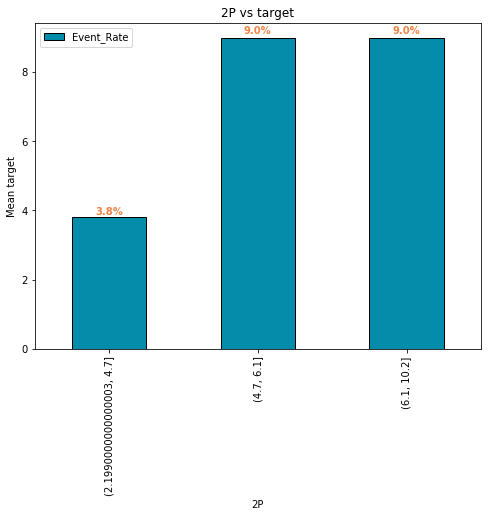

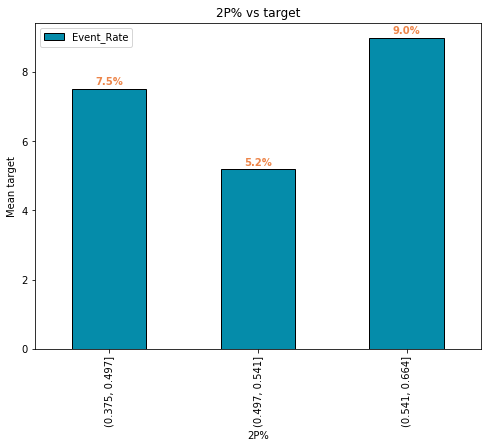

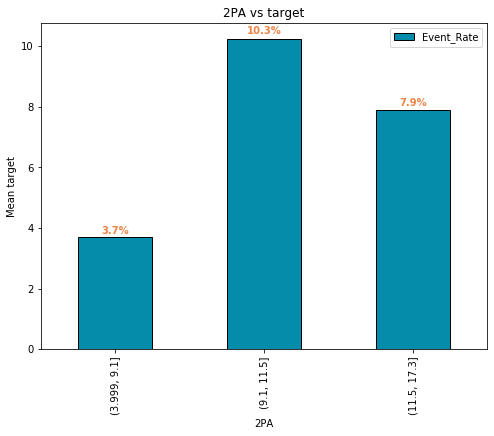

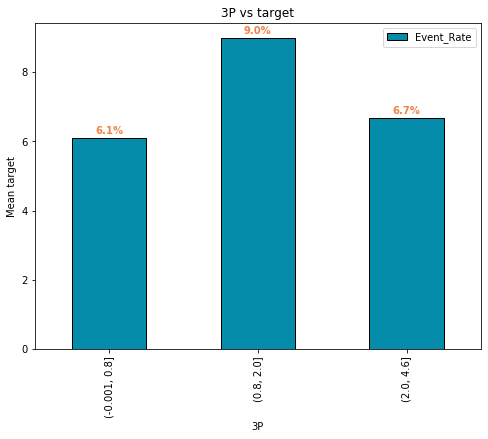

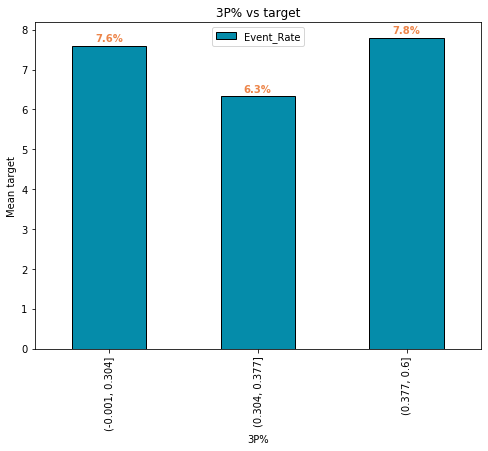

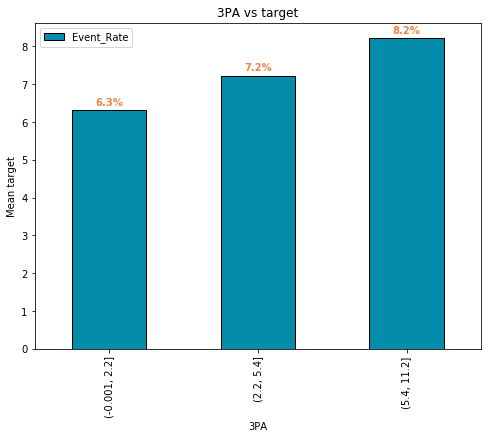

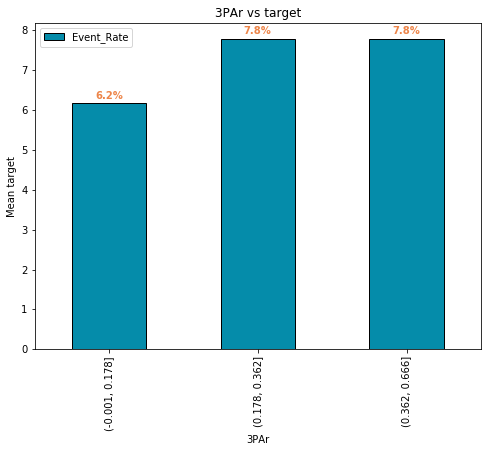

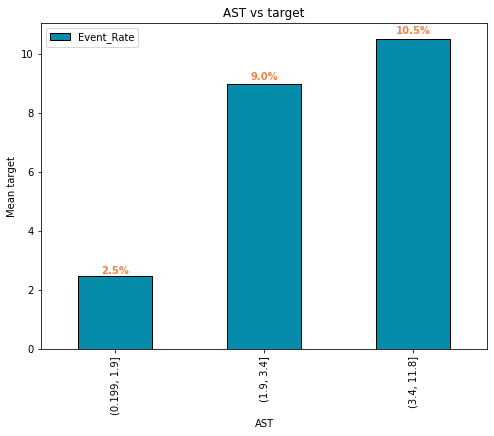

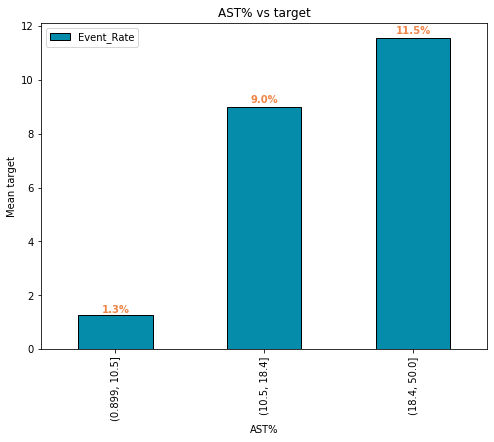

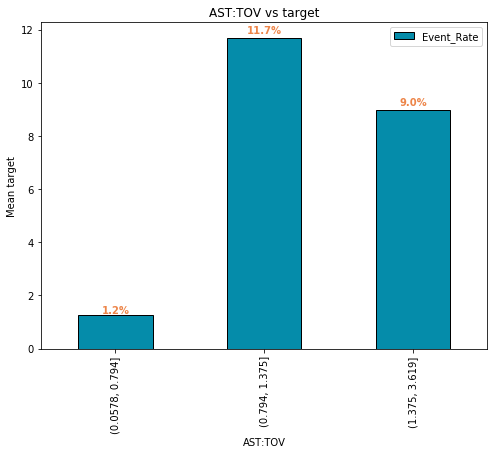

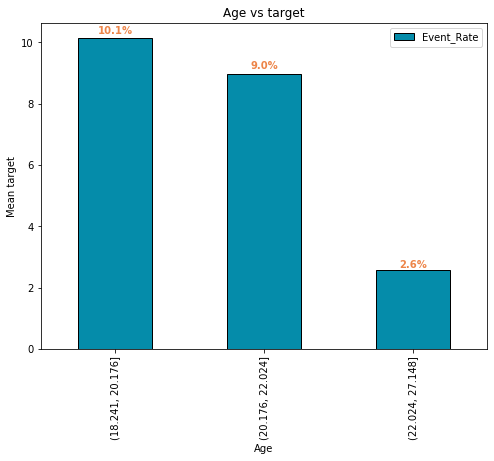

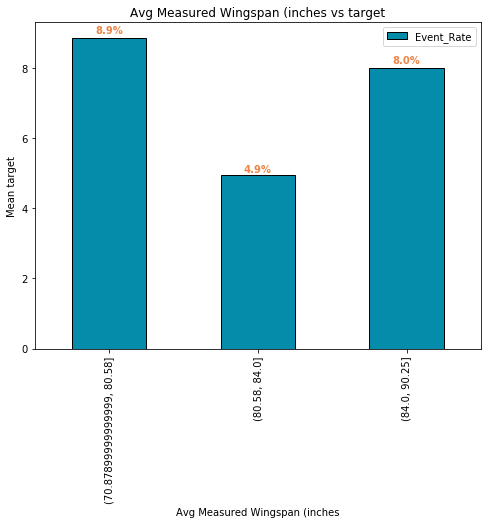

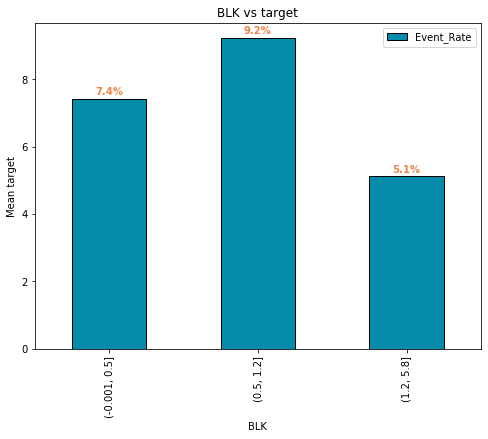

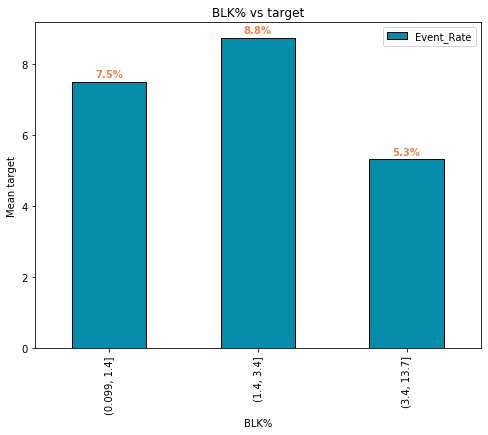

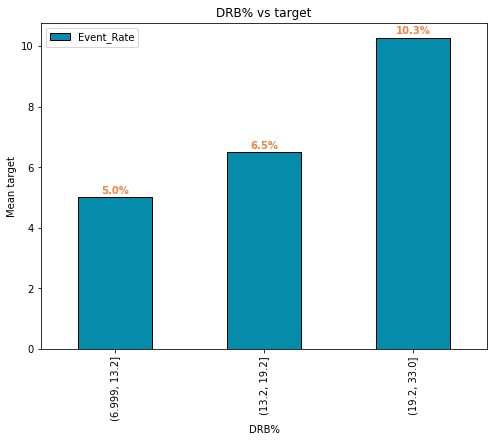

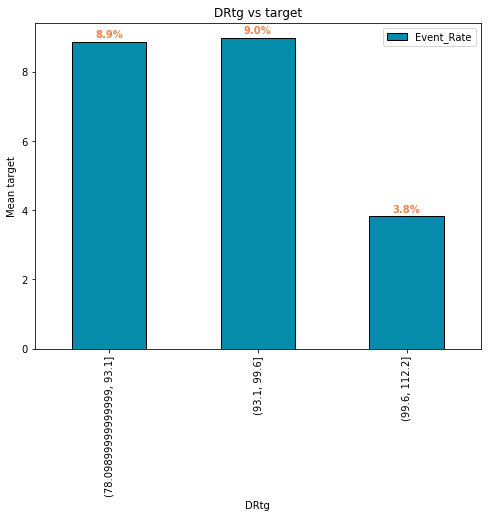

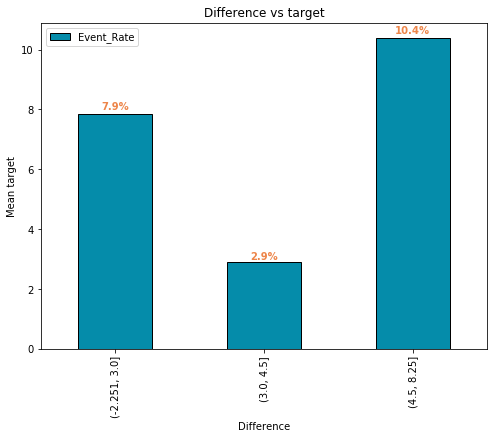

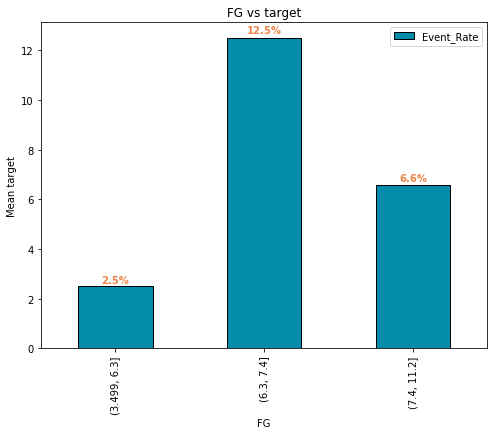

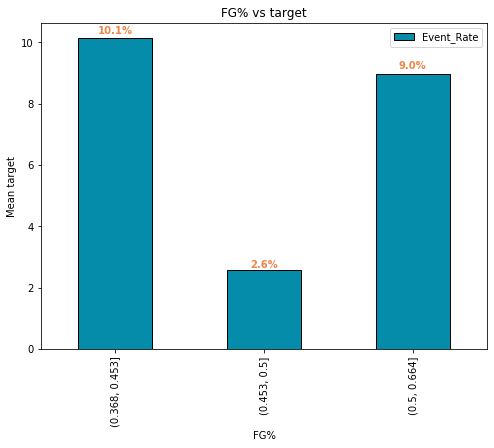

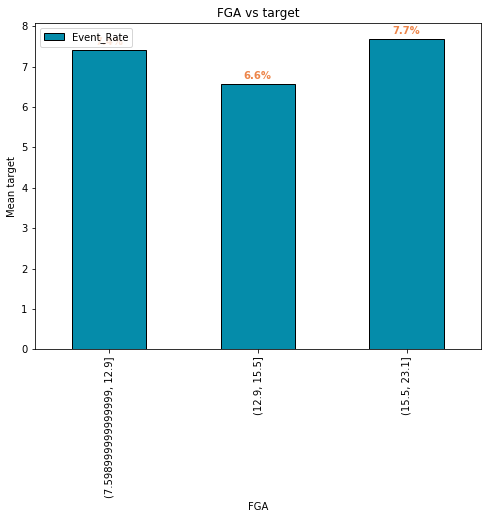

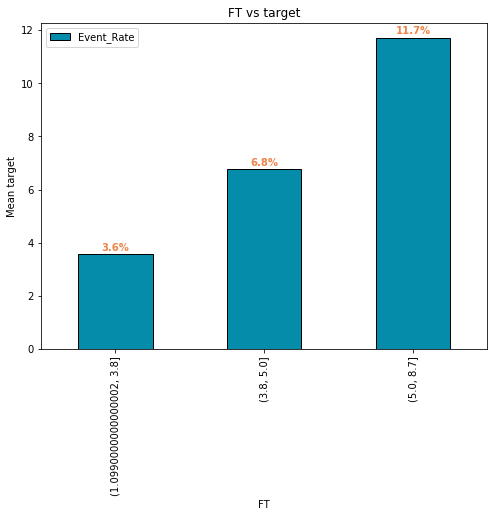

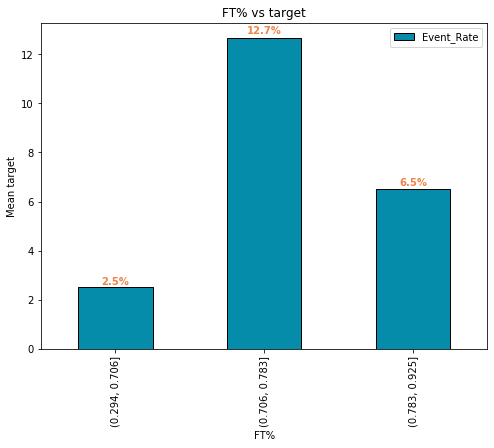

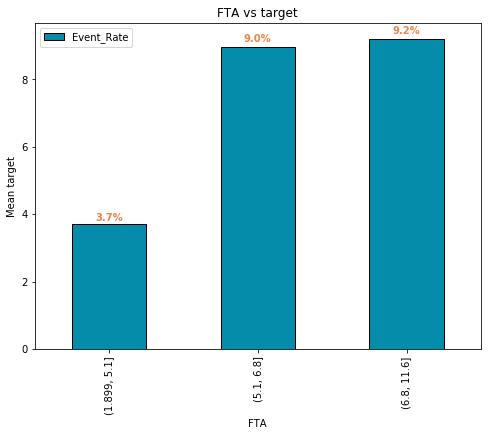

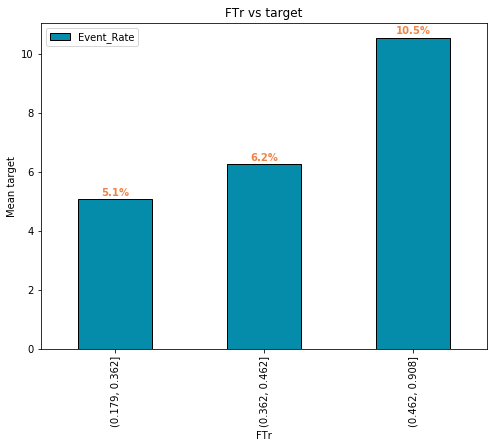

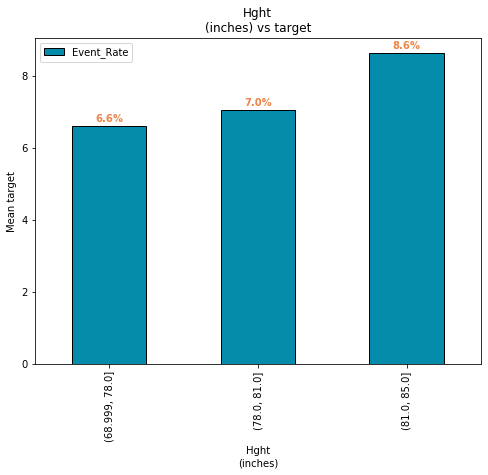

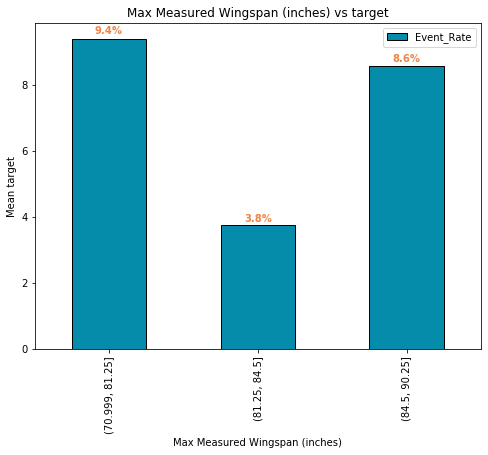

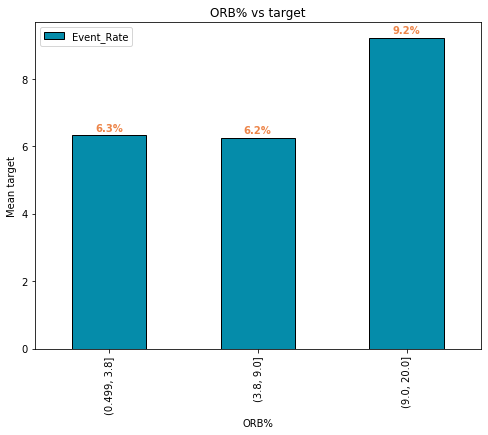

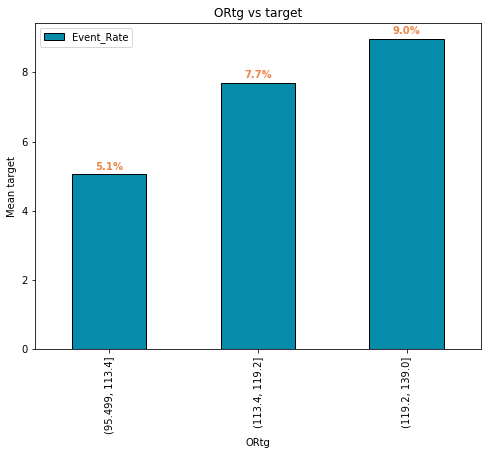

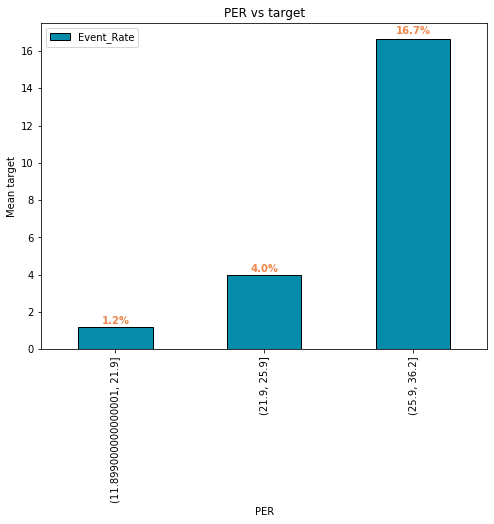

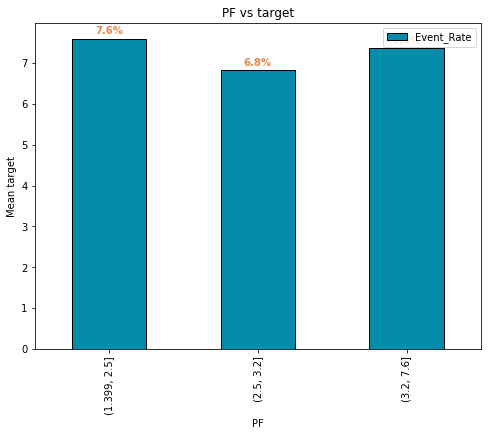

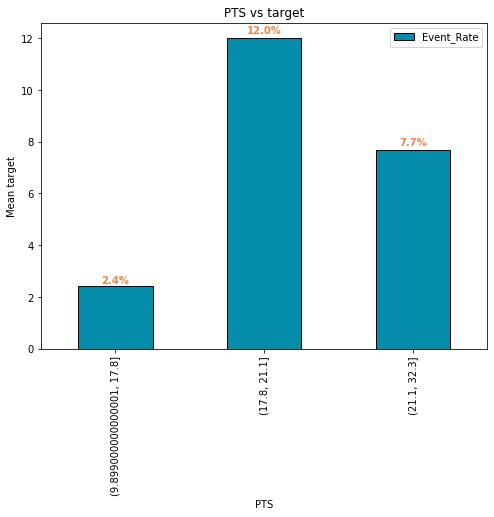

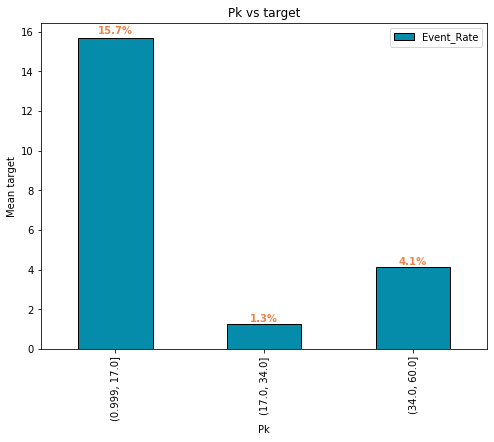

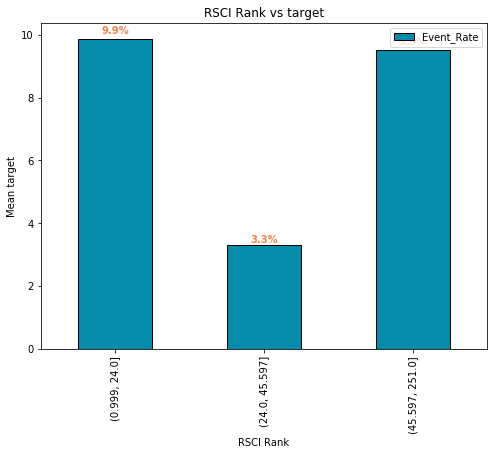

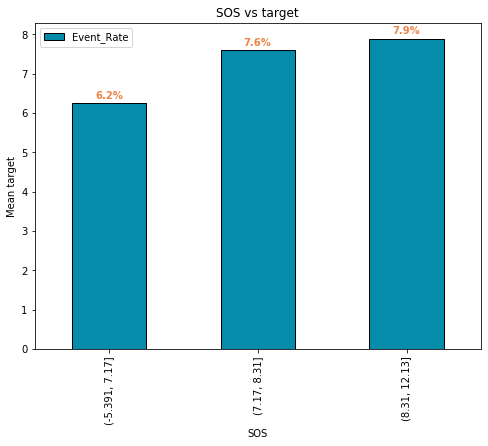

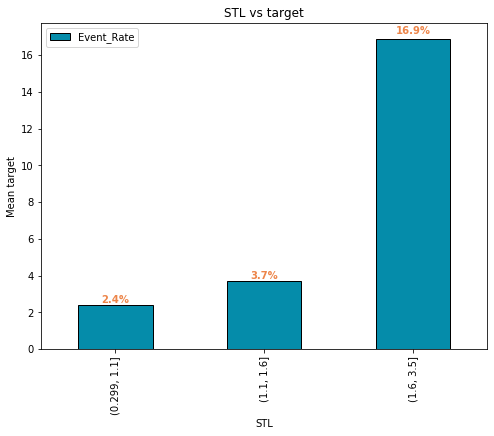

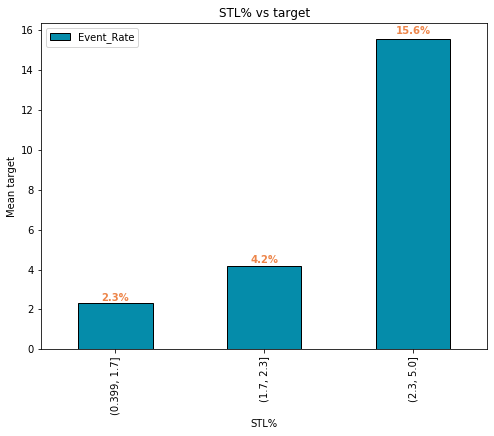

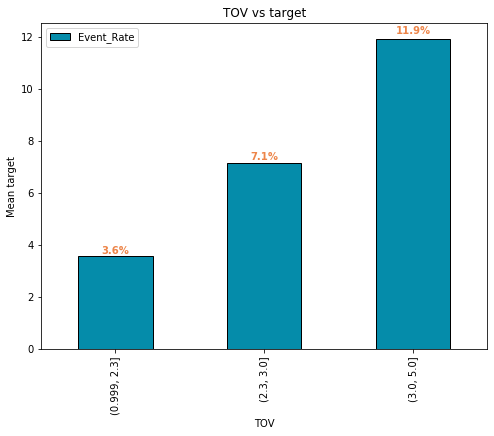

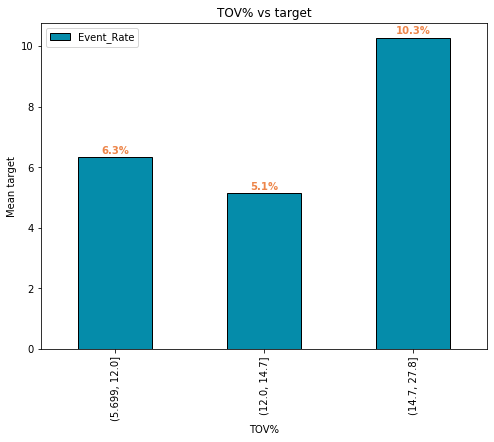

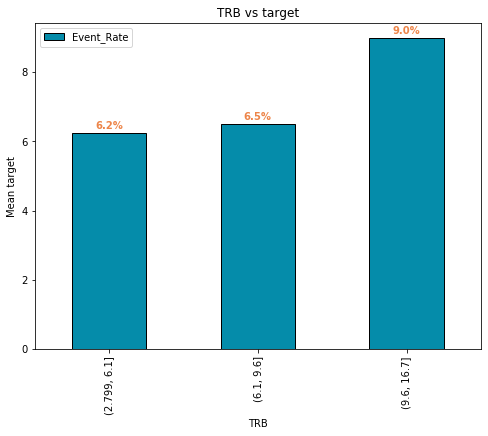

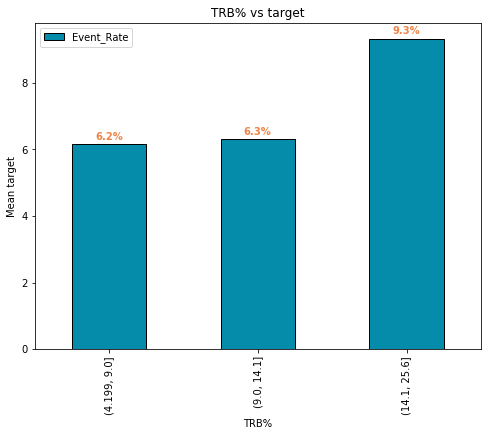

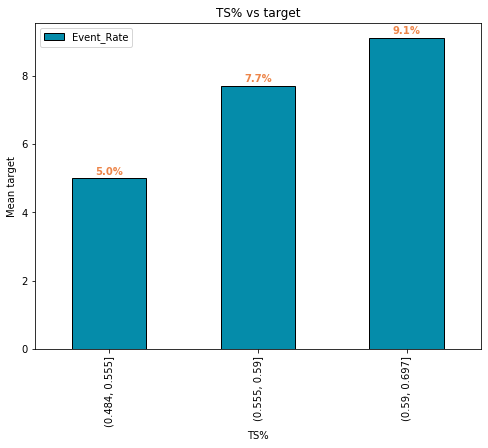

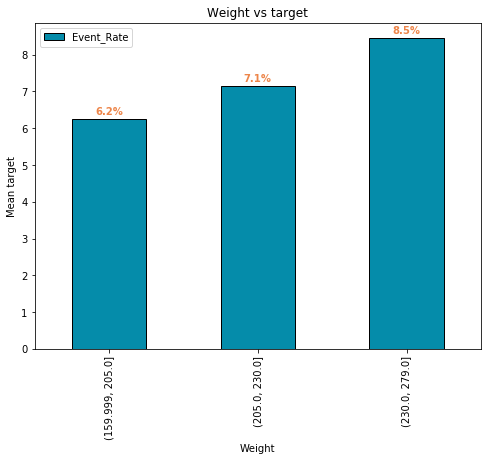

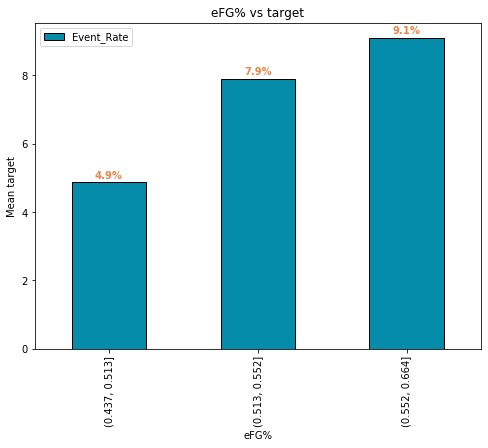

In [24]:
clf.plot(woe_df)

In [25]:
from xverse.ensemble import VotingSelector

clf = VotingSelector()
clf.fit(X, y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

VotingSelector(exclude_features=None, feature_names='all',
               handle_category='woe', minimum_votes=0, no_of_features=21,
               numerical_missing_values='median',
               selection_techniques=['WOE', 'RF', 'RFE', 'ETC', 'CS', 'L_ONE'])

In [26]:
clf.available_techniques

['WOE', 'RF', 'RFE', 'ETC', 'CS', 'L_ONE']

In [27]:
clf.feature_importances_

Variable_Name  Information_Value  Random_Forest  \
0                              PER           1.112234       0.019603   
1                               Pk           1.011285       0.071554   
2                              STL           0.837413       0.043278   
3                             STL%           0.750751       0.045974   
4                          AST:TOV           0.687161       0.009440   
5                             AST%           0.669478       0.033865   
6                              FT%           0.431568       0.007089   
7                               FG           0.423908       0.030905   
8                              PTS           0.411805       0.029290   
9                              AST           0.360765       0.028600   
10                             FG%           0.324427       0.021948   
11                             Age           0.324427       0.016341   
12                              FT           0.261947       0.025724   
13                       RSCI Rank           0.261618       0.030640   
14                             TOV           0.255928       0.004939   
15                      Difference           0.246486       0.015190   
16                             2PA           0.188314       0.018482   
17                             FTA           0.173410       0.015620   
18  Max Measured Wingspan (inches)           0.167252       0.009428   
19                              2P           0.157581       0.001468   
20                            DRtg           0.150023       0.006505   
21                             FTr           0.114382       0.020988   
22                            DRB%           0.105887       0.041840   
23                            TOV%           0.101808       0.023207   
24                            eFG%           0.076904       0.025472   
25   Avg Measured Wingspan (inches           0.069840       0.038472   
26                             TS%           0.068609       0.014500   
27                             BLK           0.063458       0.010073   
28                            ORtg           0.063003       0.029292   
29                             2P%           0.055848       0.017652   
30                            BLK%           0.045811       0.017728   
31                            TRB%           0.043488       0.000000   
32                            ORB%           0.039383       0.000000   
33                              3P           0.033374       0.014136   
34                             TRB           0.032204       0.011887   
35                          Weight           0.017130       0.008008   
36                  Hght\n(inches)           0.014110       0.062795   
37                            3PAr           0.013647       0.023372   
38                             3PA           0.012807       0.042362   
39                             SOS           0.011787       0.030211   
40                             3P%           0.009639       0.026290   
41                             FGA           0.004951       0.020152   
42                              PF           0.002518       0.035681   

    Recursive_Feature_Elimination  Extra_Trees  Chi_Square     L_One  
0                        0.580314     0.020555    0.748424  0.003407  
1                        0.000000     0.061294    1.795478 -0.007173  
2                        0.000000     0.016353    0.378044  0.000000  
3                       -0.154718     0.013848    0.348089  0.000000  
4                       -0.163585     0.030941    0.049726  0.000000  
5                        0.000000     0.008285    0.329950  0.005748  
6                        0.133266     0.009116    0.072870  0.000000  
7                       -0.451349     0.010754    0.034564  0.000000  
8                       -0.608709     0.015787    0.147359  0.000000  
9                        0.000000     0.015047    0.271181  0.000000  
10                       0.000000     0.019415    0.068803  0.000000  


In [28]:
clf.feature_votes_

Variable_Name  Information_Value  Random_Forest  \
0                              PER                  1              0   
8                              PTS                  1              1   
12                              FT                  1              1   
1                               Pk                  1              1   
3                             STL%                  1              1   
4                          AST:TOV                  1              0   
2                              STL                  1              1   
17                             FTA                  1              0   
15                      Difference                  1              0   
14                             TOV                  1              0   
5                             AST%                  1              1   
13                       RSCI Rank                  1              1   
9                              AST                  1              1   
7                               FG                  1              1   
11                             Age                  1              0   
23                            TOV%                  0              1   
30                            BLK%                  0              0   
28                            ORtg                  0              1   
36                  Hght\n(inches)                  0              1   
27                             BLK                  0              0   
25   Avg Measured Wingspan (inches                  0              1   
24                            eFG%                  0              1   
16                             2PA                  1              0   
39                             SOS                  0              1   
20                            DRtg                  1              0   
19                              2P                  1              0   
18  Max Measured Wingspan (inches)                  1              0   
10                             FG%                  1              1   
6                              FT%                  1              0   
34                             TRB                  0              0   
38                             3PA                  0              1   
33                              3P                  0              0   
37                            3PAr                  0              1   
42                              PF                  0              1   
26                             TS%                  0              0   
22                            DRB%                  0              1   
31                            TRB%                  0              0   
40                             3P%                  0              1   
41                             FGA                  0              0   
21                             FTr                  0              0   
32                            ORB%                  0              0   
35                          Weight                  0              0   
29                             2P%                  0              0   

    Recursive_Feature_Elimination  Extra_Trees  Chi_Square  L_One  Votes  
0                               1            1           1      1      5  
8                               1            0           1      1      5  
12                              1            0           1      1      5  
1                               0            1           1      1      5  
3                               1            0           1      1      5  
4                               1            1           0      1      4  
2                               0            0           1      1      4  
17                              0            1           1      1      4  
15                              1            1           0      1      4  
14                              1            0           1      1      4  
5                          

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [31]:
list(df.columns) 

['Player',
 'Pk',
 'Age',
 'SOS',
 'FG',
 'FGA',
 'FG%',
 '2P',
 '2PA',
 '2P%',
 '3P',
 '3PA',
 '3P%',
 'FT',
 'FTA',
 'FT%',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'ORtg',
 'DRtg',
 'PER',
 'TS%',
 'eFG%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'AST:TOV',
 'Hght\n(inches)',
 'Weight',
 'RSCI Rank',
 'Max Measured Wingspan (inches)',
 'Avg Measured Wingspan (inches',
 'Difference',
 'All Star']

In [32]:
features = ['Pk','Age','SOS','FG','FGA','FG%', '2P','2PA','2P%','3P','3PA','3P%','FT','FTA','FT%','TRB','AST',
'STL','BLK','TOV','PF','PTS','ORtg','DRtg','PER','TS%','eFG%','3PAr','FTr', 'ORB%','DRB%','TRB%','AST%','STL%',
 'BLK%','TOV%','AST:TOV','Hght\n(inches)','Weight','RSCI Rank', 'Max Measured Wingspan (inches)',
'Avg Measured Wingspan (inches', 'Difference']

In [33]:
import seaborn as sns

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


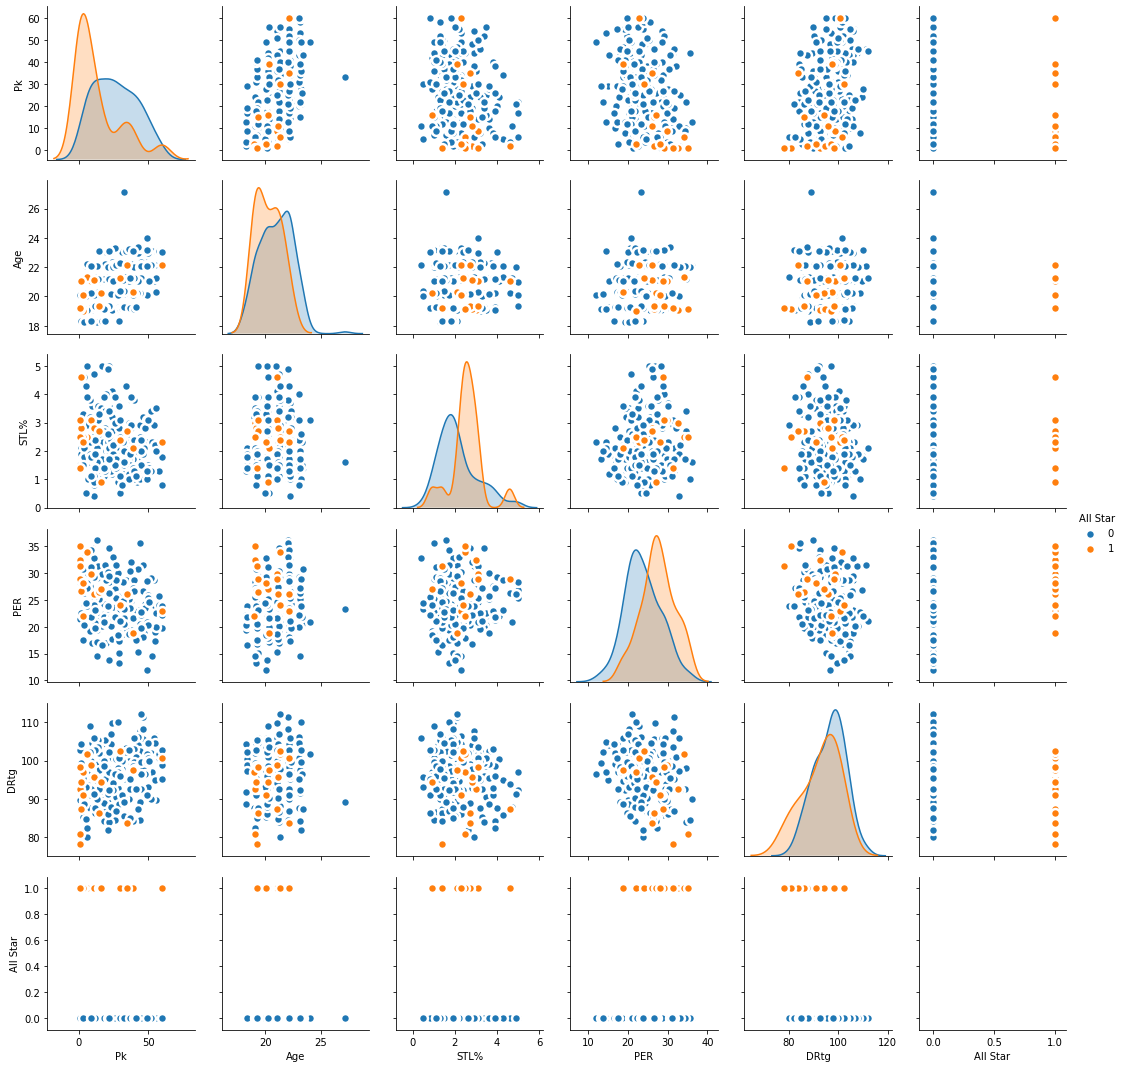

In [34]:
sns.pairplot(df[['Pk','Age','STL%', 'PER','DRtg', 'All Star']], hue='All Star',kind="scatter",plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))

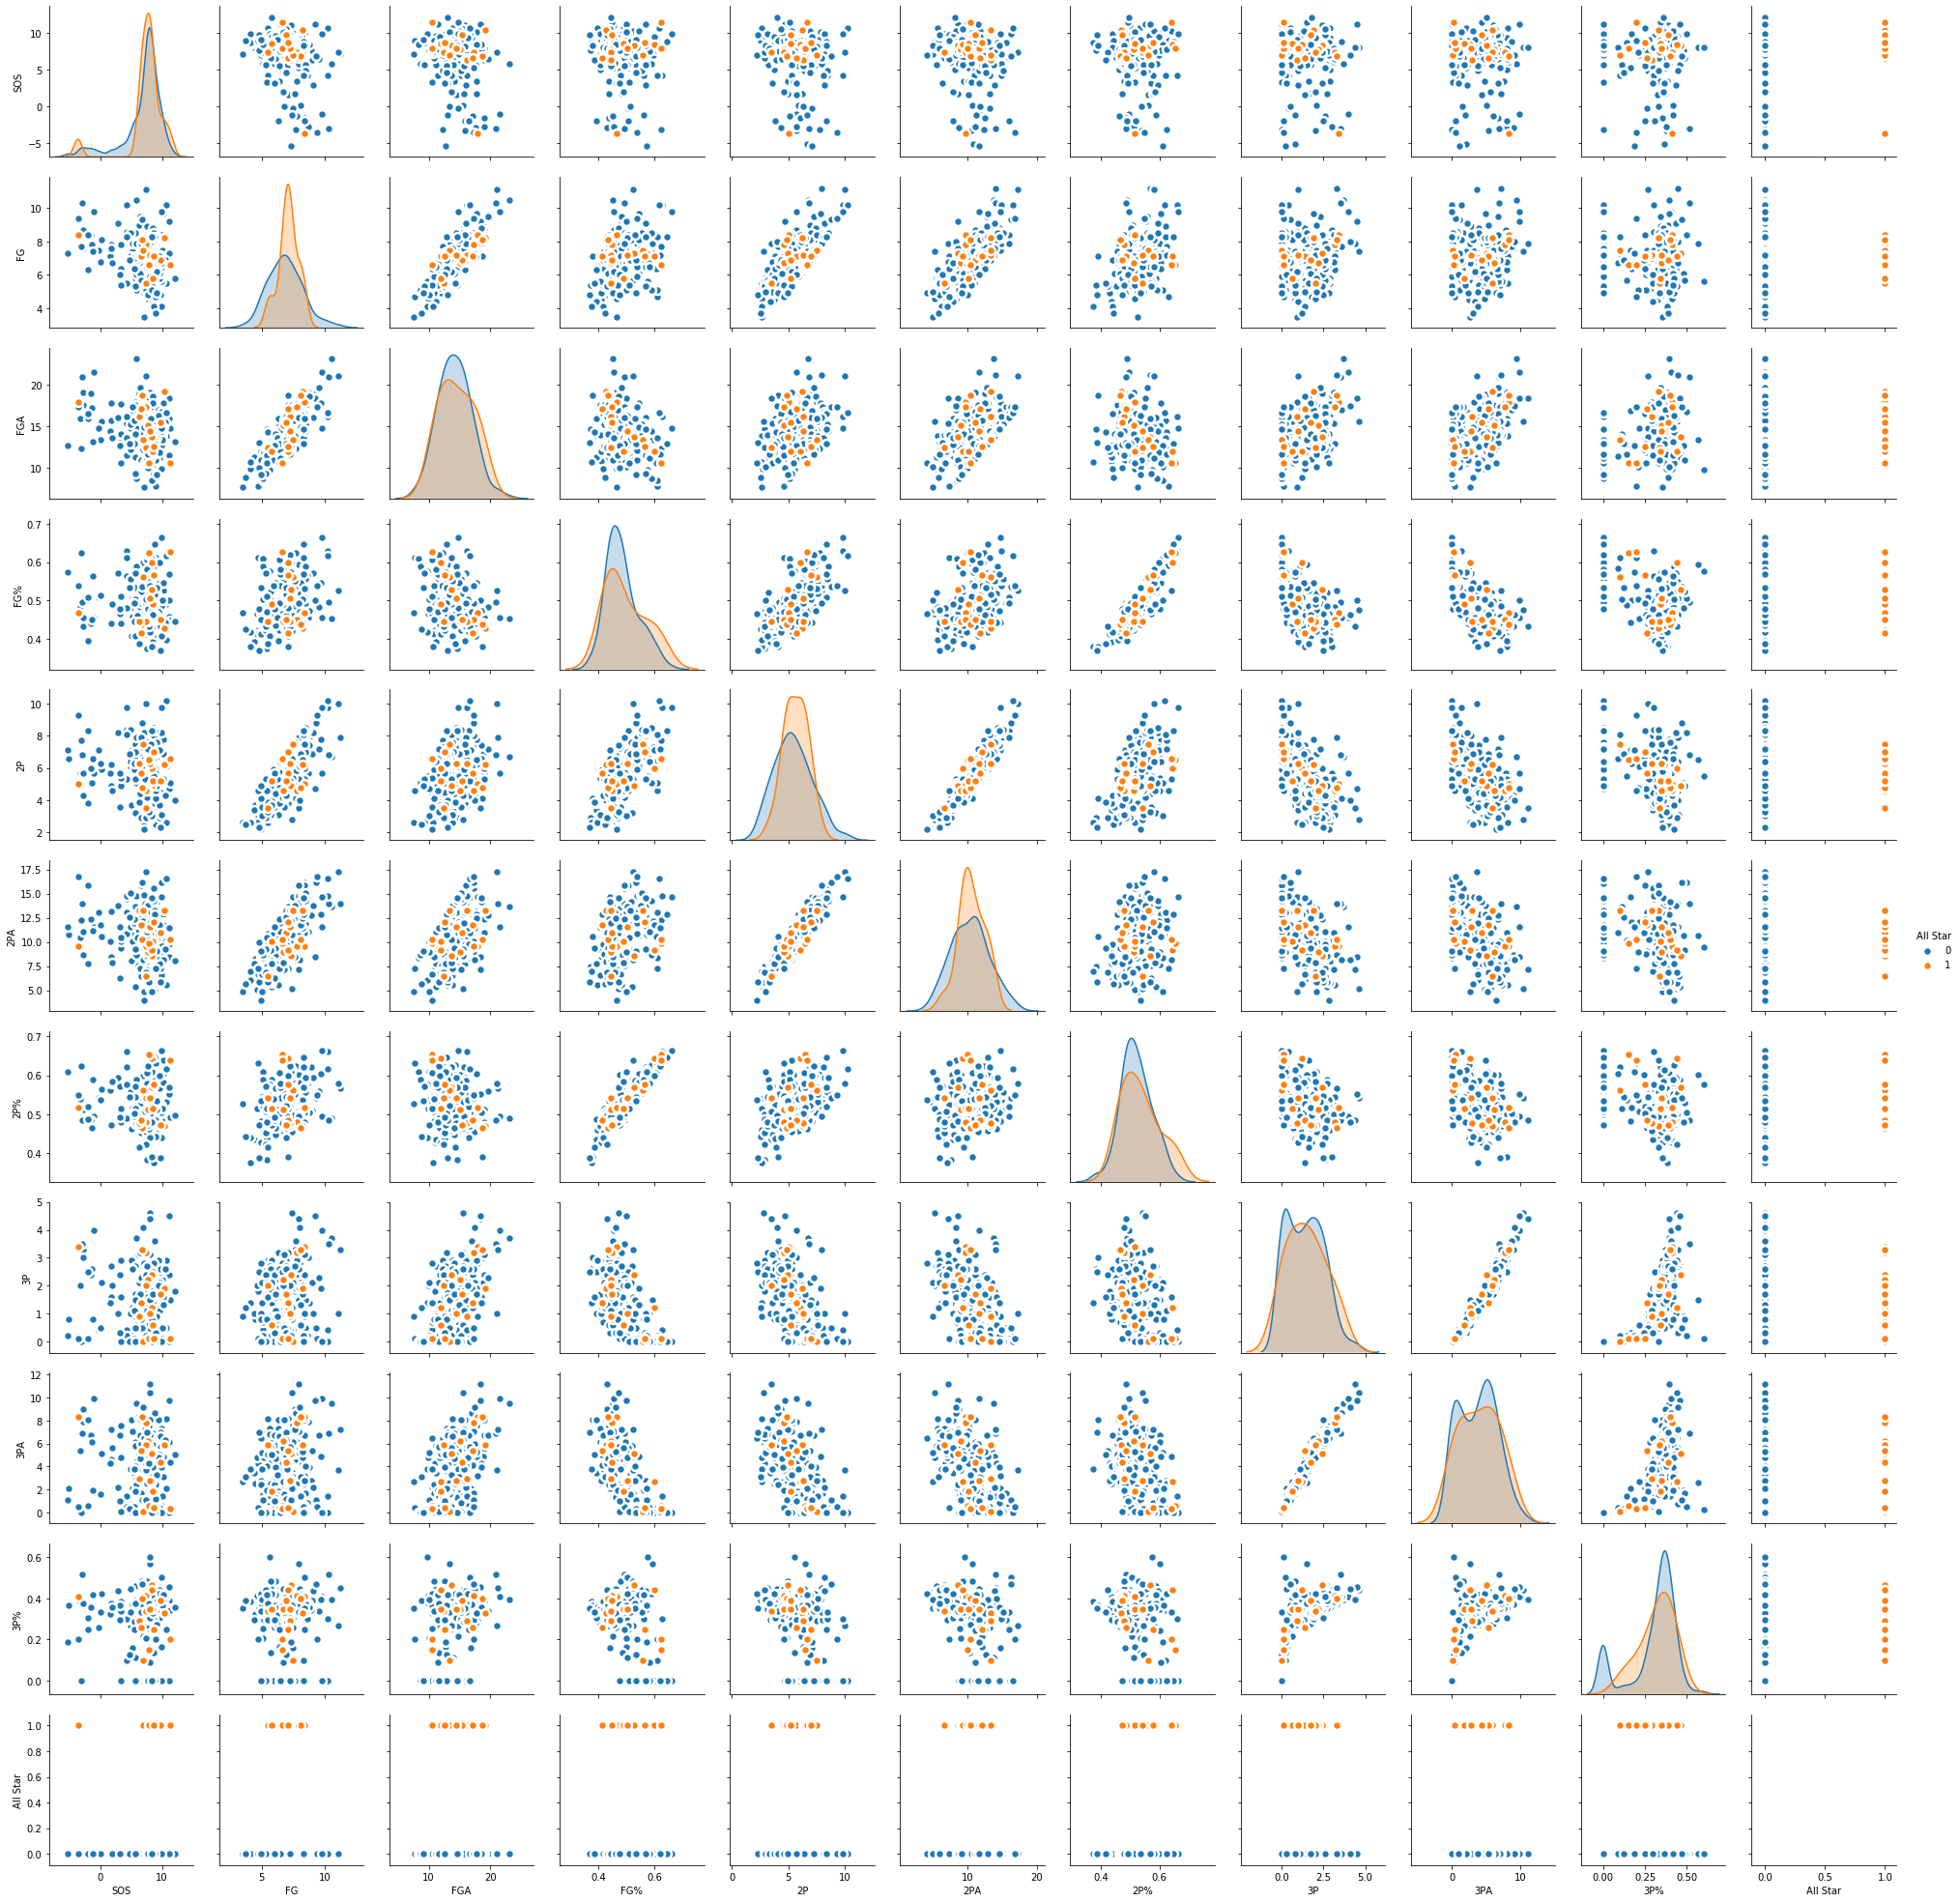

In [35]:
sns.pairplot(df[['SOS', 'FG','FGA','FG%', '2P', '2PA', '2P%', '3P','3PA','3P%','All Star']], hue='All Star',kind="scatter",plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))

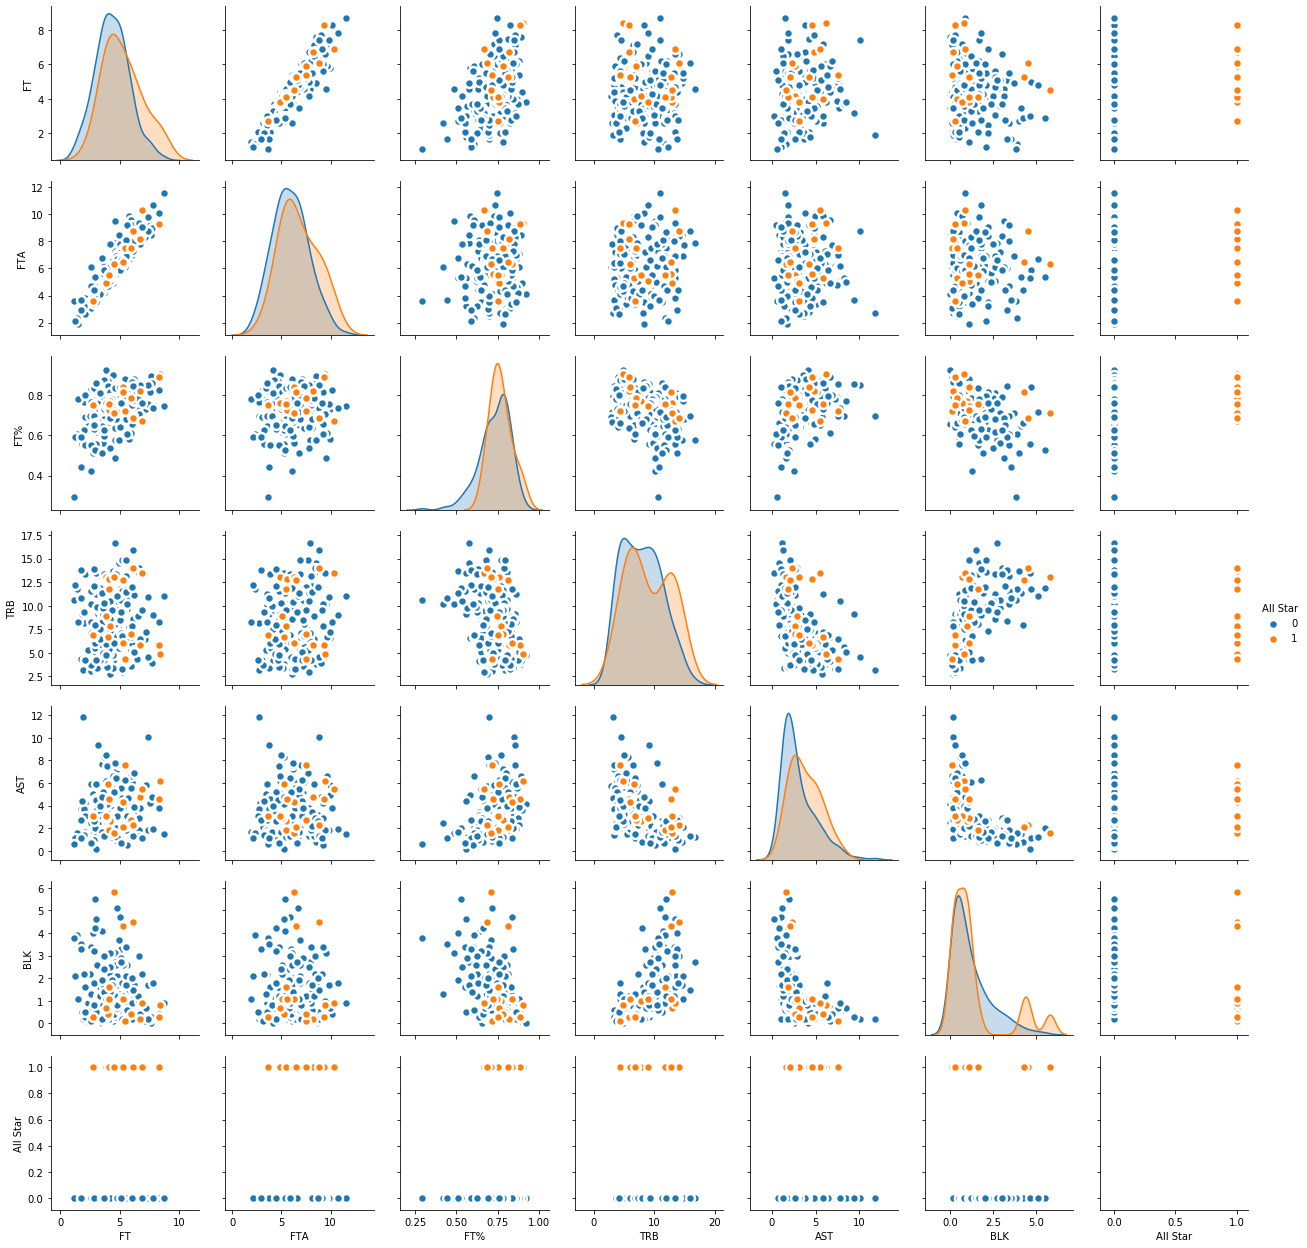

In [36]:
sns.pairplot(df[['FT','FTA','FT%','TRB','AST', 'BLK','All Star']], hue='All Star',kind="scatter",plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))

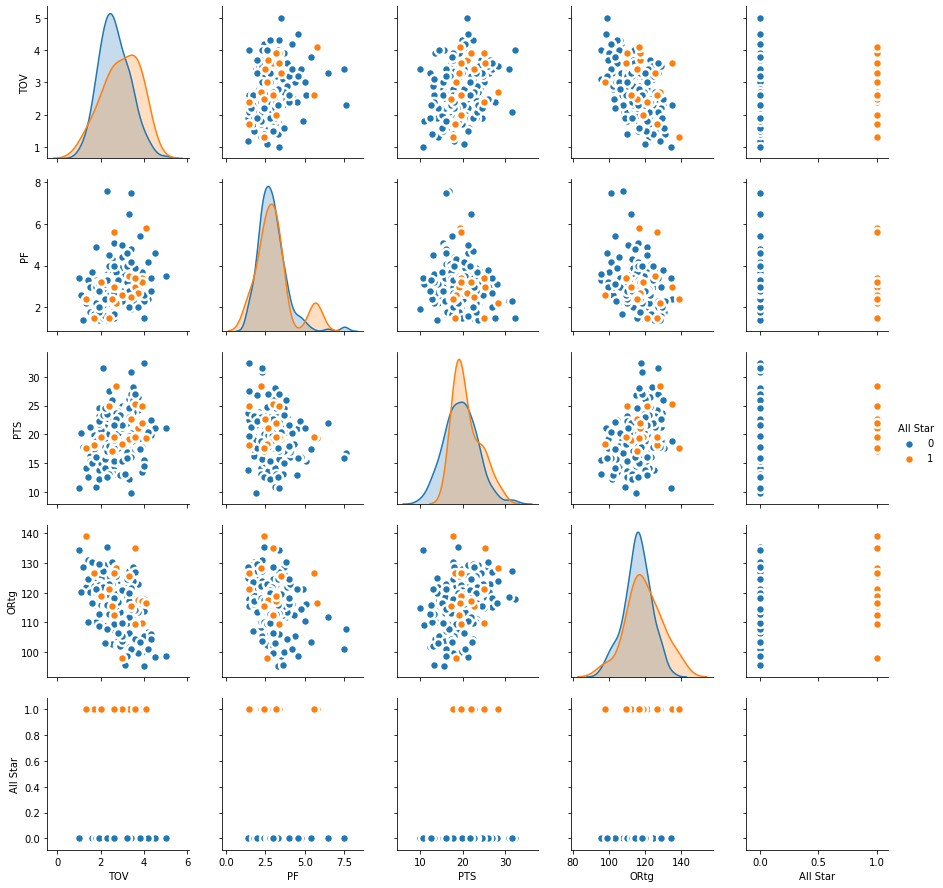

In [37]:
sns.pairplot(df[['TOV', 'PF','PTS','ORtg', 'All Star']], hue='All Star',kind="scatter",plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))

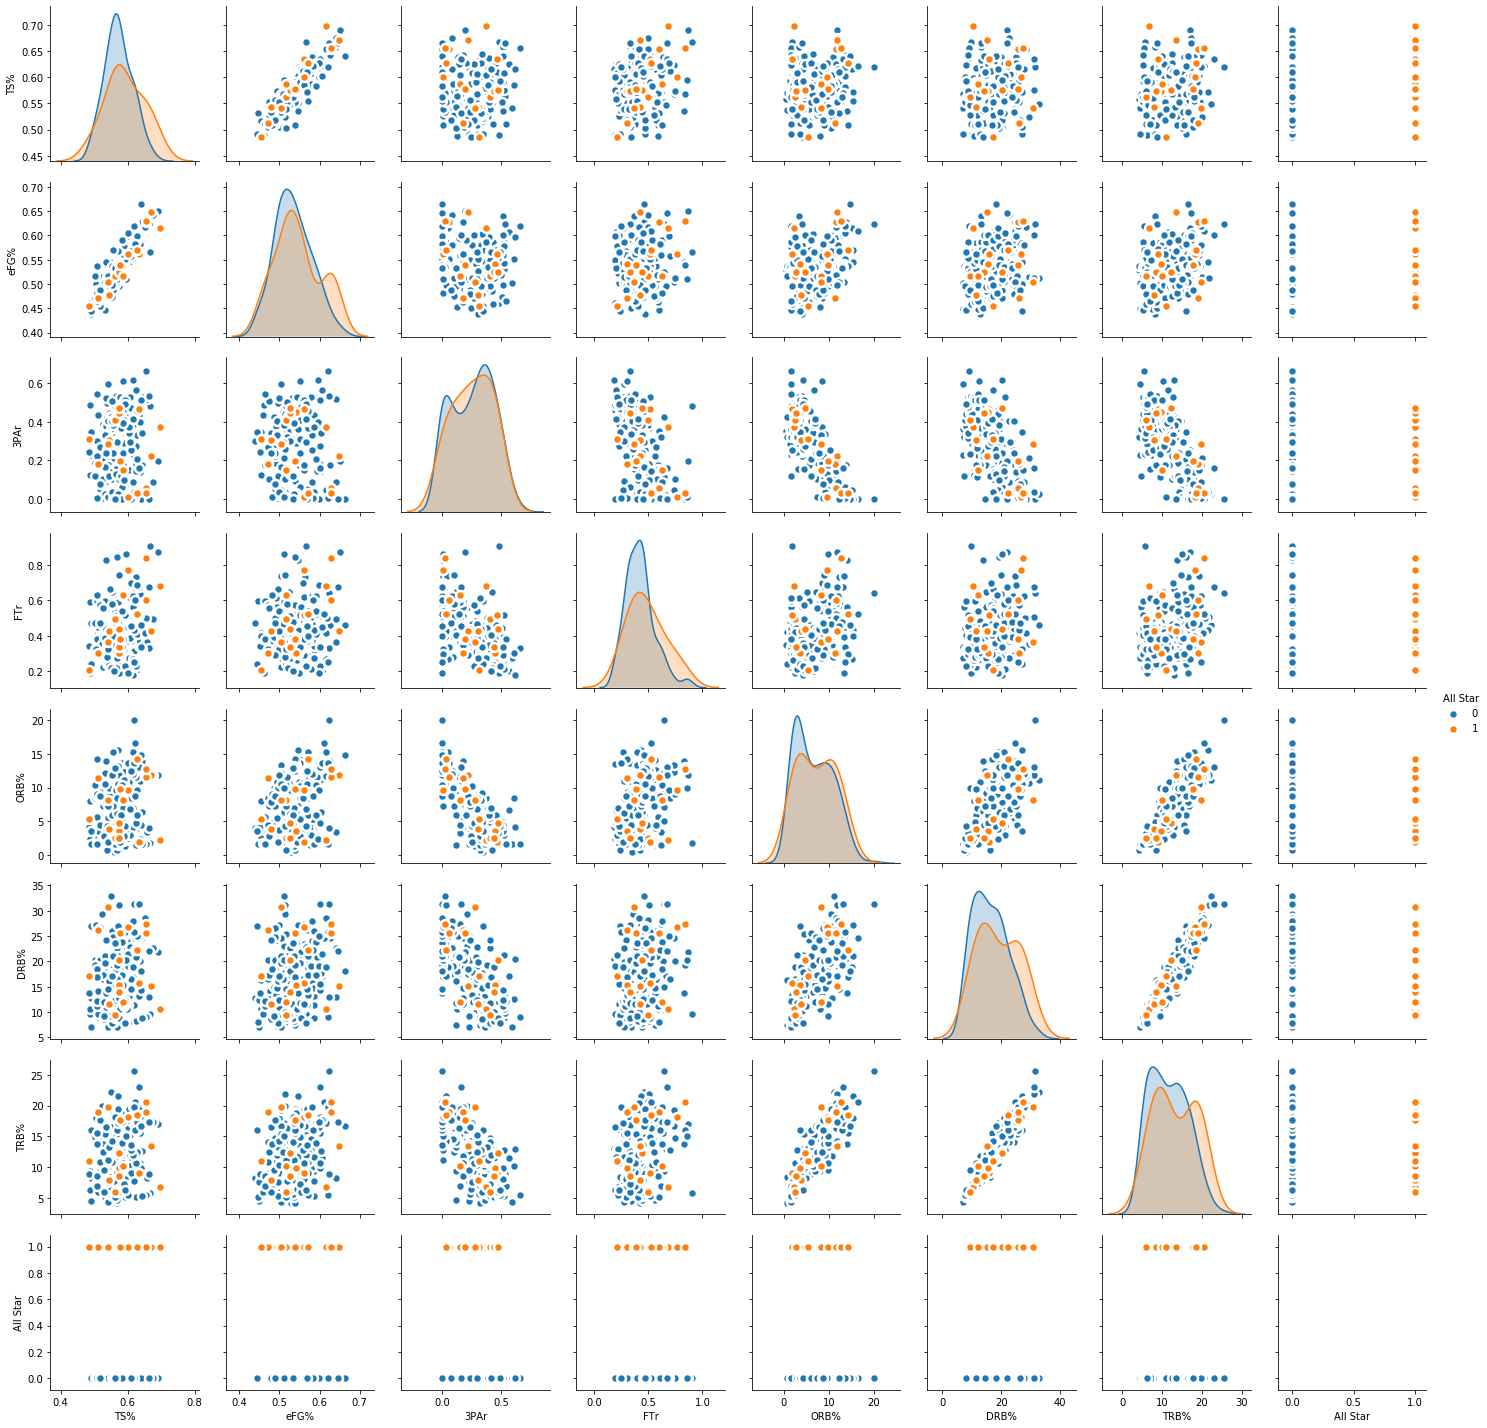

In [38]:
sns.pairplot(df[['TS%','eFG%','3PAr','FTr', 'ORB%', 'DRB%',
 'TRB%', 'All Star']], hue='All Star',kind="scatter",plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))

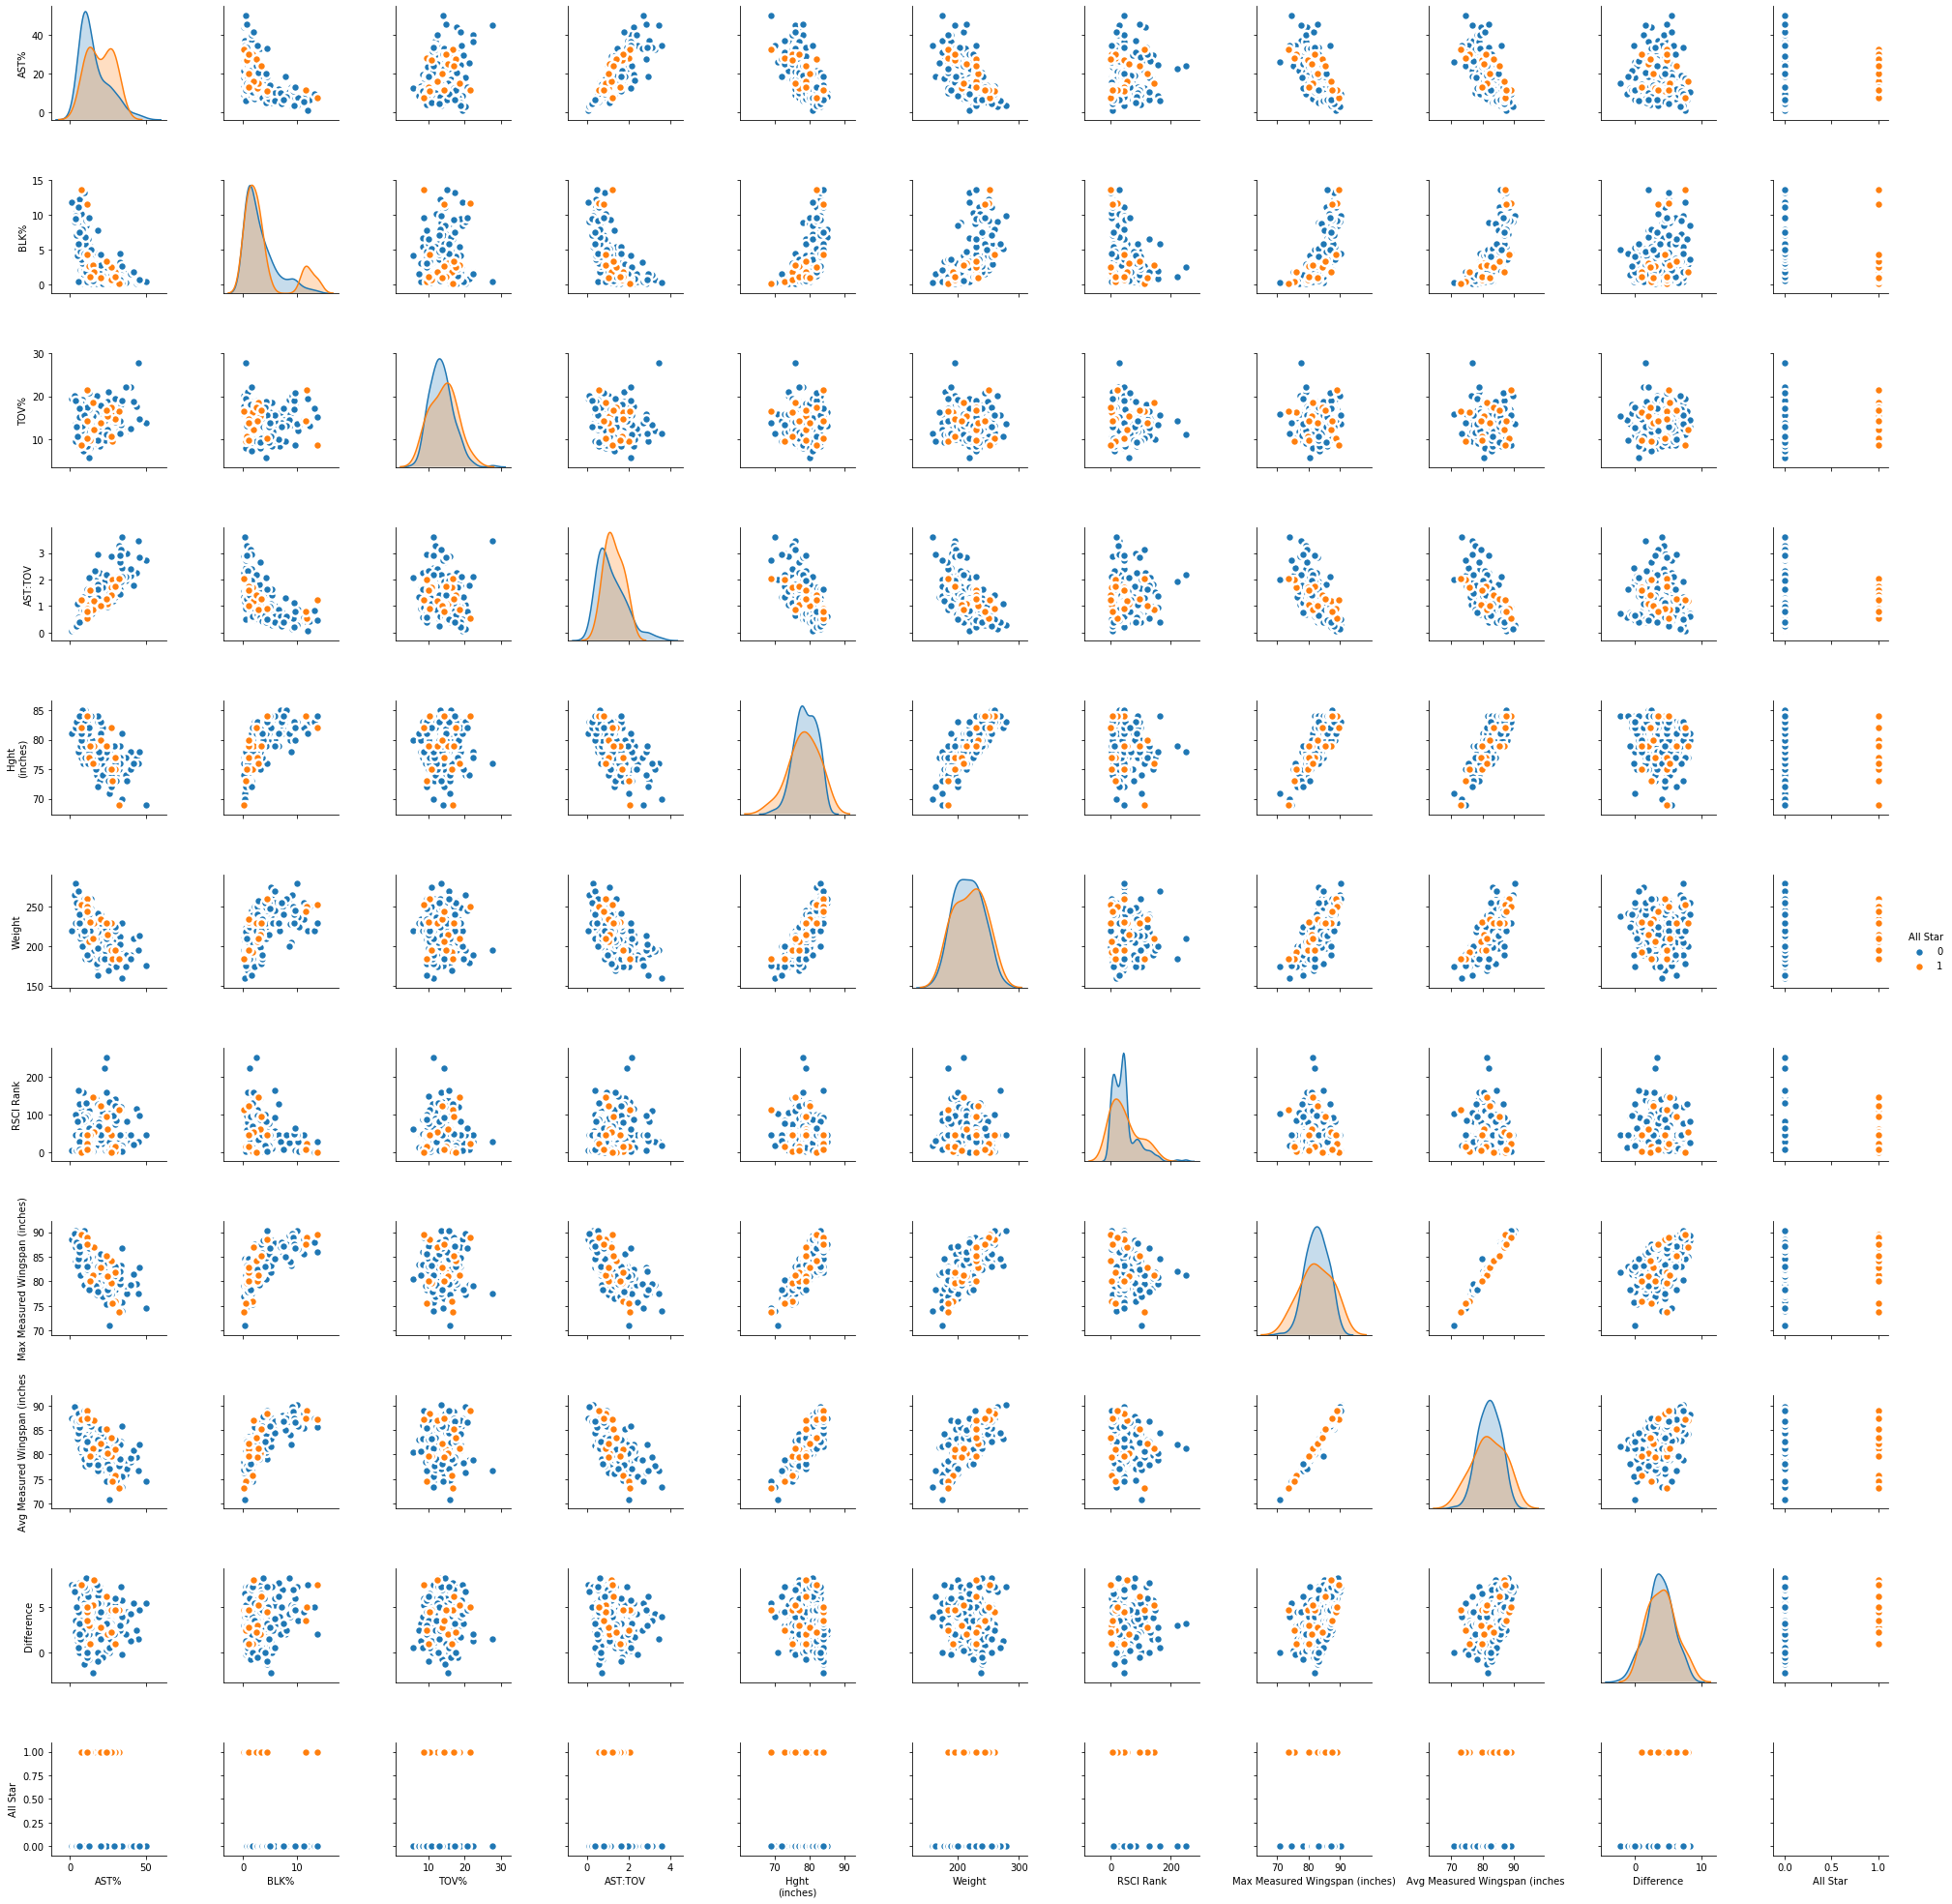

In [39]:
sns.pairplot(df[['AST%','BLK%','TOV%','AST:TOV','Hght\n(inches)','Weight','RSCI Rank','Max Measured Wingspan (inches)',
 'Avg Measured Wingspan (inches','Difference', 'All Star']], hue='All Star',kind="scatter",plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))

In [40]:
X = df.drop(['Player','All Star'], axis=1)
y = df['All Star']

/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/base.py:246: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


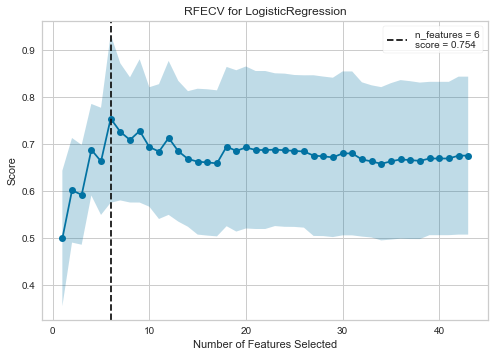

In [41]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import RFECV

cv = StratifiedKFold(5)
visualizer = RFECV(LogisticRegression(solver='liblinear', random_state=2), cv=cv, scoring='roc_auc')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Final

/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/base.py:246: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


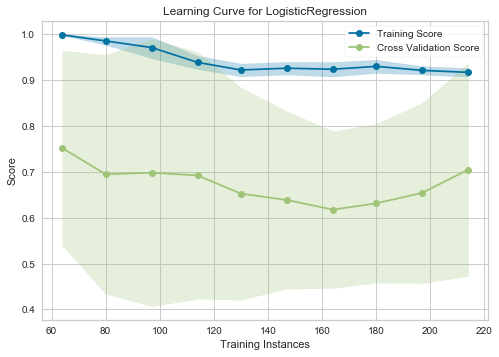

In [42]:
import numpy as np

from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import LearningCurve

# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer
model = LogisticRegression(solver='liblinear', random_state=2)
visualizer = LearningCurve(
    model, cv=cv, scoring='roc_auc', train_sizes=sizes, n_jobs=4
)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/base.py:246: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


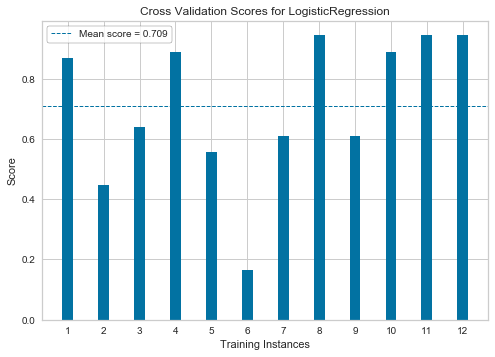

In [43]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores

# Create a cross-validation strategy
cv = StratifiedKFold(n_splits=12, random_state=42)

# Instantiate the classification model and visualizer
model = LogisticRegression(solver='liblinear', random_state=2)
visualizer = CVScores(model, cv=cv, scoring='roc_auc')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [44]:
X = df.drop(['SOS','FG','FGA','FG%','2P','2PA','2P%','3P','3PA','3P%','FT','FTA','FT%', 'TRB', 'AST',
 'STL','BLK','TOV','PF','PTS','ORtg','DRtg','TS%','eFG%','3PAr','All Star', 'FTr','ORB%','DRB%', 'TRB%',
 'AST%','BLK%','TOV%','AST:TOV','Hght\n(inches)', 'Weight','RSCI Rank', 'Player','Max Measured Wingspan (inches)',
 'Avg Measured Wingspan (inches','Difference'], axis=1)
y = df['All Star']

In [45]:
X

Pk     Age   PER  STL%
0     1  19.096  32.5   3.0
1     8  19.208  19.3   1.1
2     9  21.051  29.9   3.1
3    10  22.123  30.9   2.1
4    21  22.338  25.7   2.0
..   ..     ...   ...   ...
230   3  19.197  30.7   1.5
231   9  20.257  31.1   1.1
232  37  19.239  26.4   1.9
233  40  19.138  26.6   1.3
234  41  19.292  17.6   1.1

[235 rows x 4 columns]

/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/base.py:246: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


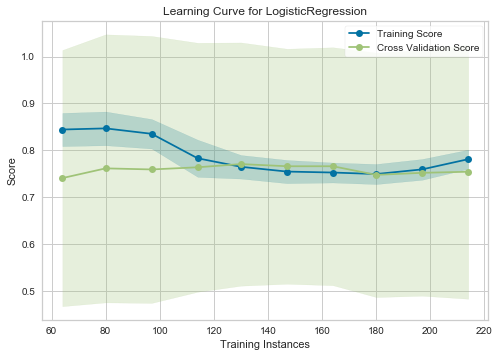

In [46]:
import numpy as np

from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import LearningCurve

# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer
model = LogisticRegression(solver='liblinear', random_state=2)
visualizer = LearningCurve(
    model, cv=cv, scoring='roc_auc', train_sizes=sizes, n_jobs=4
)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/base.py:246: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


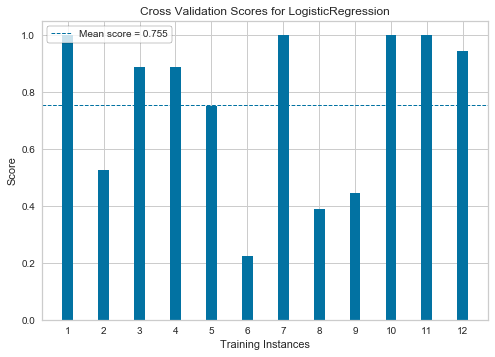

In [47]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores

# Create a cross-validation strategy
cv = StratifiedKFold(n_splits=12, random_state=42)

# Instantiate the classification model and visualizer
model = LogisticRegression(solver='liblinear', random_state=2)
visualizer = CVScores(model, cv=cv, scoring='roc_auc')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [48]:
X

Pk     Age   PER  STL%
0     1  19.096  32.5   3.0
1     8  19.208  19.3   1.1
2     9  21.051  29.9   3.1
3    10  22.123  30.9   2.1
4    21  22.338  25.7   2.0
..   ..     ...   ...   ...
230   3  19.197  30.7   1.5
231   9  20.257  31.1   1.1
232  37  19.239  26.4   1.9
233  40  19.138  26.6   1.3
234  41  19.292  17.6   1.1

[235 rows x 4 columns]

In [49]:
features = ['Pk', 'Age', 'PER','STL%']

In [50]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Train accuracy: 0.9204545454545454
Test accuracy: 0.9491525423728814
ROC AUC: 0.9761904761904763


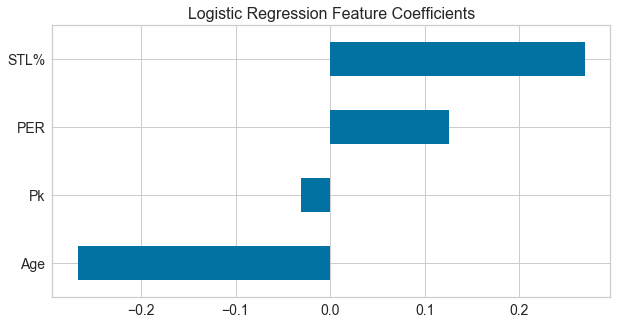

In [51]:
logreg = LogisticRegression(solver='liblinear', random_state=2).fit(x_train, y_train)
y_scores_logreg = logreg.predict_proba(x_test)[:,1]
y_pred_logreg = logreg.predict(x_test)

print("Train accuracy:",logreg.score(x_train, y_train))
print("Test accuracy:", logreg.score(x_test, y_test))
print("ROC AUC:", roc_auc_score(y_test, y_scores_logreg))

ax = pd.DataFrame(
    logreg.coef_.transpose(),
    index=features,
    columns=['coefficients']
).sort_values('coefficients').plot(
    kind='barh', legend=False, title='Logistic Regression Feature Coefficients', figsize=(10,5), fontsize=14
)

ax.title.set_size(16)

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [53]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [54]:
xg_cl = xgb.XGBClassifier()

In [55]:
params = {"max_depth": [10,30,50],
              "min_child_weight" : [1,3,6],
              "n_estimators": [200],
              "learning_rate": [0.05, 0.1,0.16],}

In [56]:
grid_search = GridSearchCV(xg_cl, params, cv = 3, verbose=10, n_jobs=-1)

In [57]:
grid_search.fit(X_train, Y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1716s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0742s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  66 out of  81 | elapsed:    2.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  75 out of  81 | elapsed:    2.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    2.1s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.16],
                         'max_depth': [10, 30, 50],
                         'min_child_weight': [1, 3, 6], 

In [58]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [59]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [60]:
xg = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1).fit(X_train, Y_train)
y_scores_xg = xg.predict_proba(X_test)[:,1]

print("Train Accuracy:",xg.score(X_train, Y_train))
print("Test Accuracy:", xg.score(X_test, Y_test))
print("ROC AUC:", roc_auc_score(Y_test, y_scores_xg))

Train Accuracy: 0.9829545454545454
Test Accuracy: 0.9491525423728814
ROC AUC: 0.9464285714285714


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


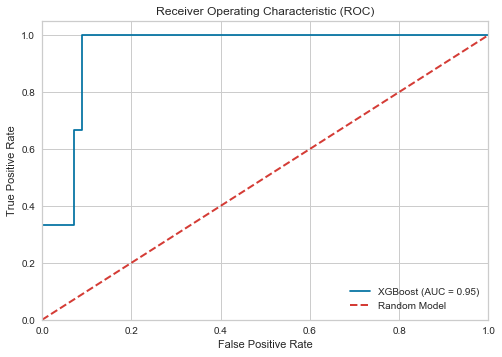

In [61]:
xg_roc_auc = roc_auc_score(Y_test, y_scores_xg)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_scores_xg)
plt.plot(fpr, tpr, label='XGBoost (AUC = %0.2f)' % xg_roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Random Model', alpha=.8)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [62]:
import shap

In [63]:
explainer = shap.TreeExplainer(xg)

In [64]:
shap_values = explainer.shap_values(X_train)

In [65]:
shap.initjs()

/opt/anaconda3/lib/python3.7/site-packages/shap/plots/summary.py:464: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


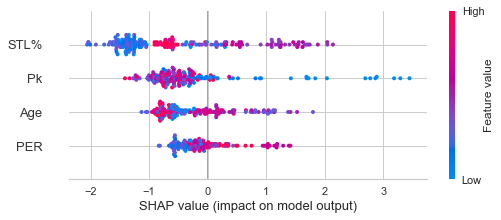

In [66]:
shap.summary_plot(shap_values, X_train)

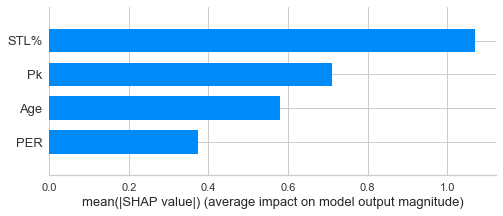

In [67]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

/opt/anaconda3/lib/python3.7/site-packages/shap/plots/dependence.py:291: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


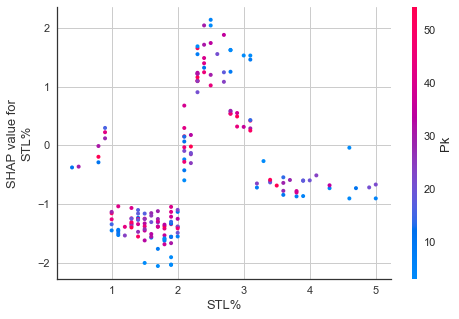

In [68]:
shap.dependence_plot("STL%", shap_values, X_train)

/opt/anaconda3/lib/python3.7/site-packages/shap/plots/dependence.py:291: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


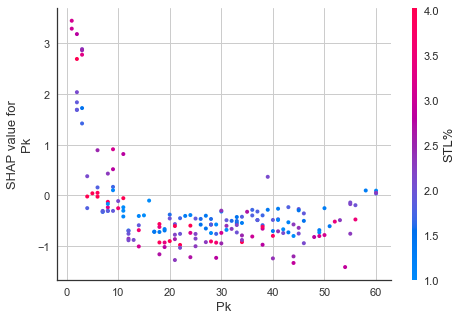

In [69]:
shap.dependence_plot("Pk", shap_values, X_train)

/opt/anaconda3/lib/python3.7/site-packages/shap/plots/dependence.py:291: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


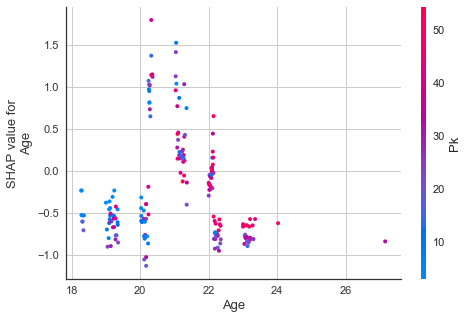

In [70]:
shap.dependence_plot("Age", shap_values, X_train)

/opt/anaconda3/lib/python3.7/site-packages/shap/plots/dependence.py:291: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


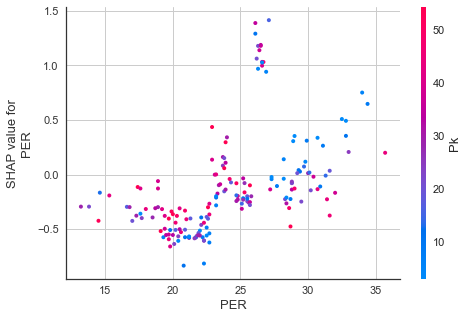

In [71]:
shap.dependence_plot("PER", shap_values, X_train)

In [72]:
shap_interaction_values = shap.TreeExplainer(xg).shap_interaction_values(X)

/opt/anaconda3/lib/python3.7/site-packages/shap/plots/summary.py:181: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


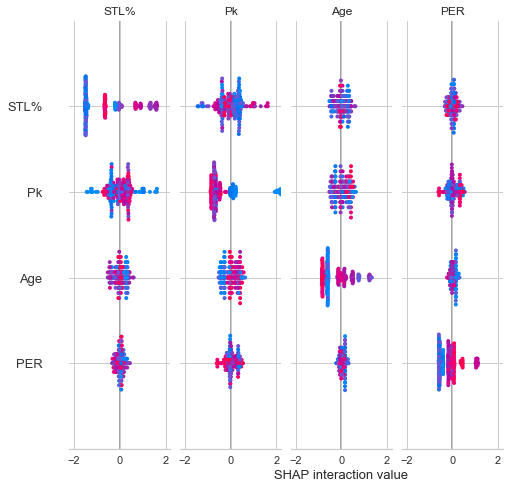

In [73]:
shap.summary_plot(shap_interaction_values, X)

/opt/anaconda3/lib/python3.7/site-packages/shap/plots/dependence.py:130: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


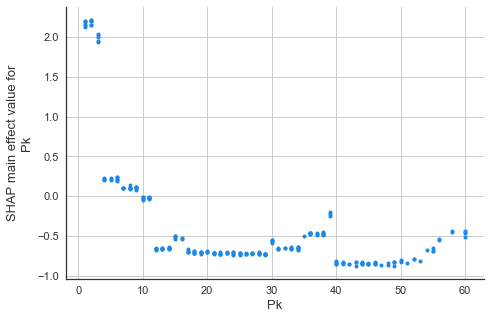

In [74]:
shap.dependence_plot(
    ("Pk", "Pk"),
    shap_interaction_values, X,
    display_features=X
)

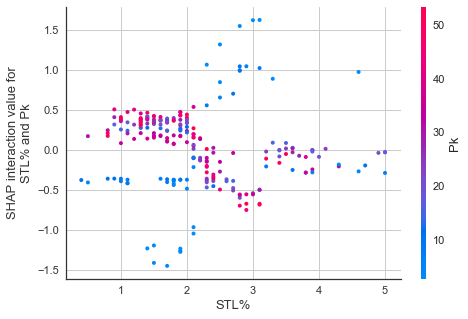

In [75]:
shap.dependence_plot(
    ("STL%", "Pk"),
    shap_interaction_values, X,
    display_features=X
)

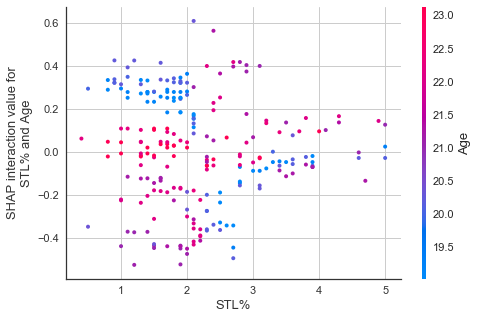

In [76]:
shap.dependence_plot(
    ("STL%", "Age"),
    shap_interaction_values, X,
    display_features=X
)

In [77]:
shap.force_plot(explainer.expected_value, shap_values, X)

In [93]:
dataset = pd.read_excel('2017 Complete Star.xlsx')

In [94]:
dataset.head()

Player  Pk    Age   PER  STL%
0  Markelle Fultz   1  19.03  27.9   2.4
1      Lonzo Ball   2  19.24  24.7   2.8
2    De'Aaron Fox   5  19.19  22.6   2.7
3    Dennis Smith   9  19.21  23.1   3.1
4   Derrick White  29  22.36  27.3   2.2

In [95]:
players = dataset['Player']
dataset = dataset.drop('Player', axis=1)
predictions = xg.predict_proba(dataset)[:,1]
print(predictions)

[0.7750917  0.7669905  0.11623544 0.07642704 0.00758636 0.00371696
 0.0025789  0.05852889 0.20931578 0.03575848 0.02046246 0.00306202
 0.01690894 0.02403894 0.03445555 0.03474351 0.00243008 0.00594643
 0.00521752 0.00589624 0.05353867 0.01852554 0.0088249  0.70929134
 0.08617493 0.004279   0.00960764 0.05995787 0.08620907 0.00624582
 0.00873416 0.15892157 0.01374862 0.00306202 0.00700228 0.01785845
 0.00669403 0.00292119 0.00641332 0.0586752  0.009855   0.00329091
 0.2924867  0.02222025 0.00479576 0.00500983 0.00375483 0.00313204
 0.01708931 0.00550636]


In [96]:
output = {'Player':players, 'All Star': predictions}
output = pd.DataFrame(output, columns = ['Player', 'All Star'])
print(output)

                 Player  All Star
0        Markelle Fultz  0.775092
1            Lonzo Ball  0.766990
2          De'Aaron Fox  0.116235
3          Dennis Smith  0.076427
4         Derrick White  0.007586
5         Frank Jackson  0.003717
6           Frank Mason  0.002579
7           Jawun Evans  0.058529
8          Monte Morris  0.209316
9         Edmond Sumner  0.035758
10  Nigel Williams-Goss  0.020462
11           Malik Monk  0.003062
12         Luke Kennard  0.016909
13     Donovan Mitchell  0.024039
14            Josh Hart  0.034456
15           Davon Reed  0.034744
16        Wesley Iwundu  0.002430
17         Dwayne Bacon  0.005946
18         Tyler Dorsey  0.005218
19       Damyean Dotson  0.005896
20       Sterling Brown  0.053539
21         Kadeem Allen  0.018526
22          Jabari Bird  0.008825
23         Jayson Tatum  0.709291
24         Josh Jackson  0.086175
25       Justin Jackson  0.004279
26           OG Anunoby  0.009608
27         Semi Ojeleye  0.059958
28        Dill

In [97]:
output.to_excel("2017 Star Prob Complete.xlsx")

In [98]:
dataset = pd.read_excel('2018 Complete Star.xlsx')

In [99]:
dataset.head()

Player  Pk     Age   PER  STL%
0      DeAndre Ayton   1  19.338  32.6   1.0
1      Marvin Bagley   2  19.104  30.6   1.4
2  Jaren Jackson Jr.   4  18.284  26.9   1.6
3      Mohamed Bamba   6  20.045  28.3   1.5
4     Michael Porter  14  19.362  20.0   3.4

In [100]:
players = dataset['Player']
dataset = dataset.drop('Player', axis=1)
predictions = xg.predict_proba(dataset)[:,1]
print(predictions)

[0.0687227  0.06243877 0.01970373 0.00749366 0.00532346 0.00646617
 0.17620148 0.00332927 0.88475144 0.00402505 0.09562123 0.00322595
 0.02402701 0.02247561 0.00641332 0.0202024  0.00410604 0.00393871
 0.00301073 0.11339764 0.01211585 0.0065019  0.01804772 0.03985279
 0.00613674 0.00545878 0.0250445  0.00862225 0.00627339 0.00422017
 0.01605034 0.2543777  0.18571116 0.07206054 0.03226742 0.01076522
 0.00528124 0.02154234 0.07337639 0.00723256]


In [101]:
output = {'Player':players, 'All Star': predictions}
output = pd.DataFrame(output, columns = ['Player', 'All Star'])
print(output)

                 Player  All Star
0         DeAndre Ayton  0.068723
1         Marvin Bagley  0.062439
2     Jaren Jackson Jr.  0.019704
3         Mohamed Bamba  0.007494
4        Michael Porter  0.005323
5        Wendell Carter  0.006466
6            Trae Young  0.176201
7         Collin Sexton  0.003329
8         Mikal Bridges  0.884751
9            Kevin Knox  0.004025
10  Shai Gilgeous-Al...  0.095621
11        Miles Bridges  0.003226
12      Robert Williams  0.024027
13         Zhaire Smith  0.022476
14        Landry Shamet  0.006413
15         Khyri Thomas  0.020202
16       Gary Trent Jr.  0.004106
17        Lonnie Walker  0.003939
18        Kevin Huerter  0.003011
19   Chandler Hutchison  0.113398
20           Troy Brown  0.012116
21     Donte DiVincenzo  0.006502
22       Omari Spellman  0.018048
23        Jalen Brunson  0.039853
24        Aaron Holiday  0.006137
25      Jerome Robinson  0.005459
26         Trevon Duval  0.025045
27          Josh Okogie  0.008622
28    De'Antho

In [102]:
output.to_excel("2018 Star Prob Complete.xlsx")